## Change sys.path to use my tensortrade instead of the one in env

In [1]:
import sys
import os
# sys.path.append("/Users/jasonfiacco/Documents/Yale/Senior/thesis/deeptrader")
# sys.path.append("/Users/jasonfiacco/Documents/Yale/Senior/thesis/deeptrader/GetOldTweets")
sys.path.append(os.path.realpath(".."))
sys.path.append(os.path.realpath("../GetOldTweets"))
print(sys.path)

['/usr/local/opt/python/Frameworks/Python.framework/Versions/3.6/lib/python36.zip', '/usr/local/opt/python/Frameworks/Python.framework/Versions/3.6/lib/python3.6', '/usr/local/opt/python/Frameworks/Python.framework/Versions/3.6/lib/python3.6/lib-dynload', '', '/Users/jasonfiacco/Documents/Yale/Senior/thesis/env5/lib/python3.6/site-packages', '/Users/jasonfiacco/Documents/Yale/Senior/thesis/env5/lib/python3.6/site-packages/IPython/extensions', '/Users/jasonfiacco/.ipython', '/Users/jasonfiacco/Documents/Yale/Senior/thesis/deeptrader', '/Users/jasonfiacco/Documents/Yale/Senior/thesis/deeptrader/GetOldTweets']


## Fetch the Labeled PredictIt Data  
Adds ALL TA features at first. Also creates the "price_norm" metric which is close/open.

In [2]:
import ssl
import pandas as pd
import ta
from datetime import datetime, timedelta

ssl._create_default_https_context = ssl._create_unverified_context # Only used if pandas gives a SSLError

def fetch_data(symbol):
    path = "../predictit_datasets/"
    filename = "{}_labeled.csv".format(symbol)

    df = pd.read_csv(path + filename)
    
    df = df.set_index("Date")


    return df

In [3]:
all_data = pd.concat([
    fetch_data("WARREN"),
    fetch_data("CRUZ"),
    fetch_data("MANCHIN"),
    fetch_data("SANDERS"),
    fetch_data("NELSON"),
    fetch_data("DONNELLY"),
    fetch_data("PELOSI"),
    fetch_data("MANAFORT"),
    fetch_data("BROWN"),
    fetch_data("RYAN"),
    fetch_data("STABENOW")
], axis=1)
all_data.head()

,WARREN:open,WARREN:low,WARREN:high,WARREN:close,WARREN:volume,WARREN:average,WARREN:price_norm,WARREN:current_date,WARREN:sentiment,WARREN:volume_adi,...,STABENOW:momentum_uo,STABENOW:momentum_stoch,STABENOW:momentum_stoch_signal,STABENOW:momentum_wr,STABENOW:momentum_ao,STABENOW:momentum_kama,STABENOW:momentum_roc,STABENOW:others_dr,STABENOW:others_dlr,STABENOW:others_cr
Date,,,,,,,,,,,,,,,,,,,,,
2017-02-01,0.81,0.79,0.82,0.80,768,0.8067,0.987654,2017-02-01,0.04693,-256.0,...,NaN,100.0,100.0,-0.0,0.0,NaN,NaN,-2.949035,NaN,0.0
2017-02-02,0.80,0.79,0.80,0.79,50,0.7996,0.987500,2017-02-02,0.05167,-306.0,...,NaN,100.0,100.0,-0.0,0.0,NaN,NaN,0.000000,0.0,0.0
2017-02-03,0.79,0.78,0.80,0.78,592,0.7813,0.987342,2017-02-03,0.07868,-898.0,...,NaN,100.0,100.0,-0.0,0.0,NaN,NaN,0.000000,0.0,0.0
2017-02-04,0.78,0.78,0.79,0.79,10,0.7900,1.012821,2017-02-04,0.14822,-888.0,...,NaN,100.0,100.0,-0.0,0.0,NaN,NaN,0.000000,0.0,0.0
2017-02-05,0.79,0.79,0.80,0.80,6,0.7950,1.012658,2017-02-05,-0.01526,-882.0,...,NaN,100.0,100.0,-0.0,0.0,NaN,NaN,0.000000,0.0,0.0


## Plot the closing prices for all the markets

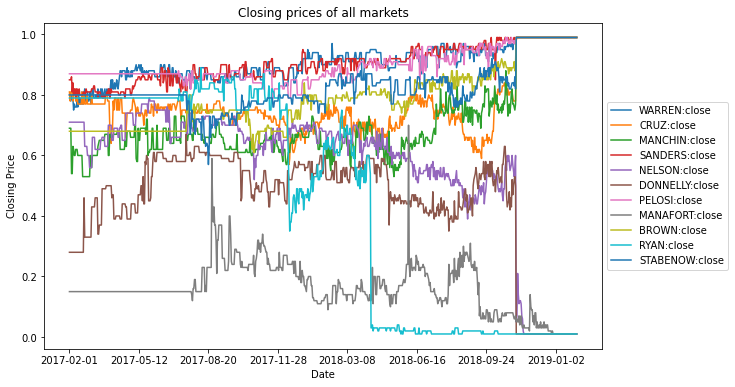

In [4]:
import matplotlib.pyplot as plt
closing_prices = all_data.loc[:, [("close" in name) for name in all_data.columns]]
closing_prices.plot(figsize=(10, 6))
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("Closing prices of all markets")
plt.legend(loc='center left', bbox_to_anchor=(1,.5))
plt.show()

In [5]:
#Copy it over cause of variable names
subset_data = all_data

## Define The Exchange

An exchange needs a name, an execution service, and streams of price data in order to function properly.

The setups supported right now are the simulated execution service using simulated or stochastic data. More execution services will be made available in the future, as well as price streams so that live data and execution can be supported.

In [6]:
from tensortrade.exchanges import Exchange
from tensortrade.exchanges.services.execution.simulated import execute_order
from tensortrade.data import Stream

#Exchange(name of exchange, service)
#It looks like each Stream takes a name, and then a list of the closing prices.

predictit_exch = Exchange("predictit", service=execute_order)(
    Stream("USD-WARREN", list(subset_data['WARREN:close'])),
    Stream("USD-CRUZ", list(subset_data['CRUZ:close'])),
    Stream("USD-MANCHIN", list(subset_data['MANCHIN:close'])),
    Stream("USD-SANDERS", list(subset_data['SANDERS:close'])),
    Stream("USD-NELSON", list(subset_data['NELSON:close'])),
    Stream("USD-DONNELLY", list(subset_data['DONNELLY:close'])),
    Stream("USD-PELOSI", list(subset_data['PELOSI:close'])),
    Stream("USD-MANAFORT", list(subset_data['MANAFORT:close'])),
    Stream("USD-BROWN", list(subset_data['BROWN:close'])),
    Stream("USD-RYAN", list(subset_data['RYAN:close'])),
    Stream("USD-STABENOW", list(subset_data['STABENOW:close']))
)

Now that the exchanges have been defined we can define our features that we would like to include, excluding the prices we have provided for the exchanges.

## Define "External Data Feed". This is where you specify custom features

In [7]:
#Select only the TA features to keep
features_to_keep = ["price_norm", "sentiment", "volume", "trend_cci", "momentum_rsi"]
feature_data = subset_data.loc[:, [(any(word in name for word in features_to_keep)) for name in subset_data.columns]]

#Remove any extra volume columns
feature_data = feature_data[feature_data.columns.drop(list(feature_data.filter(regex='volume_')))]

feature_data.head()

,WARREN:volume,WARREN:price_norm,WARREN:sentiment,WARREN:trend_cci,WARREN:momentum_rsi,CRUZ:volume,CRUZ:price_norm,CRUZ:sentiment,CRUZ:trend_cci,CRUZ:momentum_rsi,...,RYAN:volume,RYAN:price_norm,RYAN:sentiment,RYAN:trend_cci,RYAN:momentum_rsi,STABENOW:volume,STABENOW:price_norm,STABENOW:sentiment,STABENOW:trend_cci,STABENOW:momentum_rsi
Date,,,,,,,,,,,,,,,,,,,,,
2017-02-01,768,0.987654,0.04693,NaN,100.00000,1411,0.931034,0.21082,NaN,100.000000,...,0,1.0,-0.14476,NaN,100.0,0,1.0,0.095790,NaN,100.0
2017-02-02,50,0.987500,0.05167,-66.666667,0.00000,924,0.962963,0.06047,-66.666667,0.000000,...,0,1.0,-0.03245,NaN,100.0,0,1.0,-0.010530,NaN,100.0
2017-02-03,592,0.987342,0.07868,-87.500000,0.00000,25,1.038462,0.14213,-33.333333,51.851852,...,0,1.0,-0.07424,NaN,100.0,0,1.0,-0.045540,NaN,100.0
2017-02-04,10,1.012821,0.14822,-66.666667,35.83181,27,1.000000,-0.05324,-30.769231,51.851852,...,0,1.0,-0.24805,NaN,100.0,0,1.0,0.128350,NaN,100.0
2017-02-05,6,1.012658,-0.01526,41.666667,53.69863,1,1.000000,-0.12315,27.027027,51.851852,...,0,1.0,0.03573,NaN,100.0,0,1.0,-0.033814,NaN,100.0


In [8]:
#Normalize the technical features
features_to_norm = ["volume", "trend_cci", "momentum_rsi"]
cols_to_norm = [name for name in feature_data.columns if any(word in name for word in features_to_norm) ]
feature_data[cols_to_norm] = feature_data[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

#Fill any Nan in trend CCI with zeroes. (Do this AFTER normalization)
feature_data.loc[:, [("trend_cci" in name) for name in feature_data.columns]] = feature_data.loc[:, [("trend_cci" in name) for name in feature_data.columns]].fillna(value=0)


feature_data.head()

,WARREN:volume,WARREN:price_norm,WARREN:sentiment,WARREN:trend_cci,WARREN:momentum_rsi,CRUZ:volume,CRUZ:price_norm,CRUZ:sentiment,CRUZ:trend_cci,CRUZ:momentum_rsi,...,RYAN:volume,RYAN:price_norm,RYAN:sentiment,RYAN:trend_cci,RYAN:momentum_rsi,STABENOW:volume,STABENOW:price_norm,STABENOW:sentiment,STABENOW:trend_cci,STABENOW:momentum_rsi
Date,,,,,,,,,,,,,,,,,,,,,
2017-02-01,0.027972,0.987654,0.04693,0.000000,1.000000,0.004214,0.931034,0.21082,0.000000,1.000000,...,0.0,1.0,-0.14476,0.0,1.0,0.0,1.0,0.095790,0.0,1.0
2017-02-02,0.001821,0.987500,0.05167,0.408956,0.000000,0.002760,0.962963,0.06047,0.446946,0.000000,...,0.0,1.0,-0.03245,0.0,1.0,0.0,1.0,-0.010530,0.0,1.0
2017-02-03,0.021562,0.987342,0.07868,0.378923,0.000000,0.000075,1.038462,0.14213,0.482164,0.518519,...,0.0,1.0,-0.07424,0.0,1.0,0.0,1.0,-0.045540,0.0,1.0
2017-02-04,0.000364,1.012821,0.14822,0.408956,0.358318,0.000081,1.000000,-0.05324,0.484873,0.518519,...,0.0,1.0,-0.24805,0.0,1.0,0.0,1.0,0.128350,0.0,1.0
2017-02-05,0.000219,1.012658,-0.01526,0.565126,0.536986,0.000003,1.000000,-0.12315,0.545938,0.518519,...,0.0,1.0,0.03573,0.0,1.0,0.0,1.0,-0.033814,0.0,1.0


In [9]:
#Add "Streams" for all my external added features.
from tensortrade.data import DataFeed, Module

with Module("predictit") as predictit_ns:
    predictit_nodes = [Stream(name, list(feature_data[name])) for name in feature_data.columns]
    

In [10]:
#Then create the Feed from it
external_feed = DataFeed([predictit_ns])
external_feed.next()

{'predictit:/WARREN:volume': 0.027972027972027972,
 'predictit:/WARREN:price_norm': 0.9876543209876544,
 'predictit:/WARREN:sentiment': 0.04693000000000001,
 'predictit:/WARREN:trend_cci': 0.0,
 'predictit:/WARREN:momentum_rsi': 1.0,
 'predictit:/CRUZ:volume': 0.004214456391875746,
 'predictit:/CRUZ:price_norm': 0.9310344827586208,
 'predictit:/CRUZ:sentiment': 0.21081999999999998,
 'predictit:/CRUZ:trend_cci': 0.0,
 'predictit:/CRUZ:momentum_rsi': 1.0,
 'predictit:/MANCHIN:volume': 0.0,
 'predictit:/MANCHIN:price_norm': 1.0,
 'predictit:/MANCHIN:sentiment': 0.14649,
 'predictit:/MANCHIN:trend_cci': 0.0,
 'predictit:/MANCHIN:momentum_rsi': 1.0,
 'predictit:/SANDERS:volume': 0.0,
 'predictit:/SANDERS:price_norm': 1.0,
 'predictit:/SANDERS:sentiment': -0.028980000000000027,
 'predictit:/SANDERS:trend_cci': 0.0,
 'predictit:/SANDERS:momentum_rsi': 1.0,
 'predictit:/NELSON:volume': 0.0,
 'predictit:/NELSON:price_norm': 1.0,
 'predictit:/NELSON:sentiment': 0.010239999999999987,
 'predictit:

## Portfolio

Make the portfolio using the any combinations of exchanges and intruments that the exchange supports

In [11]:
#I am going to have to add "instruments" for all 25 of the PredictIt markets I'm working with.
from tensortrade.instruments import USD, WARREN, CRUZ, MANCHIN, SANDERS, NELSON, DONNELLY,\
                                PELOSI, MANAFORT, BROWN, RYAN, STABENOW
from tensortrade.wallets import Wallet, Portfolio

portfolio = Portfolio(USD, [
    Wallet(predictit_exch, 10000 * USD),
    Wallet(predictit_exch, 0 * WARREN),
    Wallet(predictit_exch, 0 * CRUZ),
    Wallet(predictit_exch, 0 * MANCHIN),
    Wallet(predictit_exch, 0 * SANDERS),
    Wallet(predictit_exch, 0 * NELSON),
    Wallet(predictit_exch, 0 * DONNELLY),
    Wallet(predictit_exch, 0 * PELOSI),
    Wallet(predictit_exch, 0 * MANAFORT),
    Wallet(predictit_exch, 0 * BROWN),
    Wallet(predictit_exch, 0 * RYAN),
    Wallet(predictit_exch, 0 * STABENOW)
])

## First Launch Ray. 
This is where you define our training "Trading Enviroment," which includes things such as the action scheme, the reward scheme, the window size, and whether or not to use the "interal feed" (internal data feed has all the price data from the wallets and the networth of the portfolio).

In [12]:
#Add the deeptrader path to ALL workers, not just the current worker
import os
parent_dir = os.path.realpath("..")
os.environ["PYTHONPATH"] = parent_dir + ":" + os.environ.get("PYTHONPATH", "")

In [13]:
#Try and get rid of that yaml warning (although this only does it for THIS worker)
import yaml
yaml.warnings({'YAMLLoadWarning': False})

In [14]:
# Environment
from tensortrade.environments import TradingEnvironment


import gym
import ray
from ray import tune
from ray.tune import grid_search
from ray.tune.registry import register_env

import ray.rllib.agents.ppo as ppo
import ray.rllib.agents.dqn as dqn
from ray.tune.logger import pretty_print
from tensortrade.rewards import RiskAdjustedReturns
    
class RayTradingEnv(TradingEnvironment):
    def __init__(self):        
        env = TradingEnvironment(
            feed=external_feed,
            portfolio=portfolio,
            action_scheme="simple",
            reward_scheme="diversified",
            window_size=15,
            enable_logger=False,
            renderers = 'screenlog'
        ) 
        self.env = env
        self.action_space = self.env.action_space
        self.observation_space = self.env.observation_space
        
        

    def reset(self):
        return self.env.reset()

    def step(self, action):
        return self.env.step(action)

def env_creator(env_config):
    return RayTradingEnv()

register_env("ray_trading_env", env_creator)


#ray.init(ignore_reinit_error=True, local_mode=True)

## Train using Tune

In [15]:
#Implement Custom neural network model
from ray.rllib.models import ModelCatalog
from ray.rllib.models.tf.tf_modelv2 import TFModelV2
from ray.rllib.agents.dqn.distributional_q_model import DistributionalQModel
from ray.rllib.utils import try_import_tf

tf = try_import_tf()

class CNNModel(DistributionalQModel):
    """Custom model for DQN."""

    def __init__(self, obs_space, action_space, num_outputs, model_config,
                 name, **kw):
        super(CNNModel, self).__init__(
            obs_space, action_space, num_outputs, model_config, name, **kw)

        # Define neural net layers
        self.base_model = tf.keras.Sequential([
            tf.keras.layers.InputLayer(input_shape=obs_space.shape),
            tf.keras.layers.Conv1D(filters=64, kernel_size=6, padding="same", activation="tanh"),
            tf.keras.layers.MaxPooling1D(pool_size=2),
            tf.keras.layers.Conv1D(filters=32, kernel_size=3, padding="same", activation="tanh"),
            tf.keras.layers.MaxPooling1D(pool_size=2),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(num_outputs, activation="sigmoid"),
            tf.keras.layers.Dense(num_outputs, activation="softmax")
        ])
        
        self.register_variables(self.base_model.variables)

    # Implement the core forward method
    def forward(self, input_dict, state, seq_lens):
        model_out = self.base_model(input_dict["obs"])
        return model_out, state
    
ModelCatalog.register_custom_model("cnn_model", CNNModel)

In [16]:
# Population based training
from ray.tune.schedulers import PopulationBasedTraining
import random

pbt = PopulationBasedTraining(
    time_attr="time_total_s",
    metric="episode_reward_mean",
    mode="max",
    perturbation_interval=240, #Every 10,000 steps, consider changing learning rate
    hyperparam_mutations={
        "lr": lambda: random.uniform(.00001, .01),
        #"train_batch_size": lambda: random.uniform(10, 100),
    } 
)

In [17]:
analysis = tune.run(
        "DQN",
        name = "DQN38-diversified2",
        #scheduler=pbt, #Use Population Based Training
        #num_samples=4, #Number of different hyperparameters to sample
        #reuse_actors=True,
        checkpoint_freq = 50,
        checkpoint_at_end=True,
        stop={
            "timesteps_total": 10000000,
        },
        config={
            "env": "ray_trading_env",
            "lr": .0004,  # try different lrs
            "num_workers": 6,  # parallelism,
            #"eager": "true",
            "model": {
                "custom_model": "cnn_model"
            }
        },
        
    )

2020-03-27 20:46:52,672	INFO resource_spec.py:212 -- Starting Ray with 4.54 GiB memory available for workers and up to 2.28 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-03-27 20:46:53,104	INFO services.py:1078 -- View the Ray dashboard at localhost:8265


Trial name,status,loc
DQN_ray_trading_env_9e2e1bb0,RUNNING,


(pid=38182) 2020-03-27 20:46:58,704	INFO trainer.py:420 -- Tip: set 'eager': true or the --eager flag to enable TensorFlow eager execution
(pid=38182) 2020-03-27 20:46:59,822	INFO trainer.py:580 -- Current log_level is WARN. For more information, set 'log_level': 'INFO' / 'DEBUG' or use the -v and -vv flags.
(pid=38182) /Users/jasonfiacco/Documents/Yale/Senior/thesis/env5/lib/python3.6/site-packages/ray/rllib/utils/from_config.py:134: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
(pid=38182)   obj = yaml.load(type_)
(pid=38182) 2020-03-27 20:47:01,666	WARNING util.py:37 -- Install gputil for GPU system monitoring.
(pid=38185) /Users/jasonfiacco/Documents/Yale/Senior/thesis/env5/lib/python3.6/site-packages/ray/rllib/utils/from_config.py:134: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyam

Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_20-47-22
  done: false
  episode_len_mean: .nan
  episode_reward_max: .nan
  episode_reward_mean: .nan
  episode_reward_min: .nan
  episodes_this_iter: 0
  episodes_total: 0
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 1.0
    - 1.0
    - 1.0
    - 1.0
    - 1.0
    - 1.0
    grad_time_ms: .nan
    learner: {}
    num_steps_sampled: 1008
    num_steps_trained: 0
    num_target_updates: 2
    opt_peak_throughput: 0.0
    opt_samples: .nan
    replay_time_ms: .nan
    sample_time_ms: 253.431
    update_time_ms: 12.088
  iterations_since_restore: 1
  node_ip: 192.168.0.175
  num_healthy_workers: 6
  off_policy_estimator: {}
  perf:
    cpu_util_percent: 72.47666666666667
    ram_util_percent: 61.31666666666668
  pid: 38182
  policy_reward_max: {}
  policy_reward_mean: {}
  policy_reward_min: {}
  sample

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,nan,20.8246,1008,1


(pid=38182) /Users/jasonfiacco/Documents/Yale/Senior/thesis/env5/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
(pid=38182)   out=out, **kwargs)
(pid=38182) /Users/jasonfiacco/Documents/Yale/Senior/thesis/env5/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
(pid=38182)   ret = ret.dtype.type(ret / rcount)


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_20-47-34
  done: false
  episode_len_mean: .nan
  episode_reward_max: .nan
  episode_reward_mean: .nan
  episode_reward_min: .nan
  episodes_this_iter: 0
  episodes_total: 0
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 1.0
    - 1.0
    - 1.0
    - 1.0
    - 1.0
    - 1.0
    grad_time_ms: 10.842
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 0.05533452704548836
        mean_q: 0.03711914271116257
        mean_td_error: -7321823.0
        min_q: 0.018527967855334282
        model: {}
    num_steps_sampled: 2016
    num_steps_trained: 1344
    num_target_updates: 4
    opt_peak_throughput: 2951.507
    opt_samples: 32.0
    replay_time_ms: 4.624
    sample_time_ms: 278.599
    update_time_ms: 12.408
  iterations_since_restore: 2
  node_ip: 192.168.0.175
  num_

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,nan,33.2204,2016,2


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_20-47-48
  done: false
  episode_len_mean: .nan
  episode_reward_max: .nan
  episode_reward_mean: .nan
  episode_reward_min: .nan
  episodes_this_iter: 0
  episodes_total: 0
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.9012159705162048
    - 0.9012159705162048
    - 0.9012159705162048
    - 0.9012159705162048
    - 0.9012159705162048
    - 0.9012159705162048
    grad_time_ms: 11.033
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 0.05814701318740845
        mean_q: 0.033171579241752625
        mean_td_error: -17471520.0
        min_q: 0.010894181206822395
        model: {}
    num_steps_sampled: 3024
    num_steps_trained: 2688
    num_target_updates: 6
    opt_peak_throughput: 2900.487
    opt_samples: 32.0
    replay_time_ms: 4.678
    sample_time_ms: 313.

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,nan,47.2348,3024,3


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_20-48-04
  done: false
  episode_len_mean: .nan
  episode_reward_max: .nan
  episode_reward_mean: .nan
  episode_reward_min: .nan
  episodes_this_iter: 0
  episodes_total: 0
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.8024320006370544
    - 0.8024320006370544
    - 0.8024320006370544
    - 0.8024320006370544
    - 0.8024320006370544
    - 0.8024320006370544
    grad_time_ms: 11.009
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 0.08251602947711945
        mean_q: 0.05272010341286659
        mean_td_error: -2445825.5
        min_q: 0.014071768149733543
        model: {}
    num_steps_sampled: 4032
    num_steps_trained: 4032
    num_target_updates: 8
    opt_peak_throughput: 2906.744
    opt_samples: 32.0
    replay_time_ms: 4.762
    sample_time_ms: 370.94

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,nan,63.006,4032,4


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_20-48-17
  done: false
  episode_len_mean: 730.0
  episode_reward_max: 2422180827.2760315
  episode_reward_mean: 586239436.3240075
  episode_reward_min: -7231297.40281359
  episodes_this_iter: 6
  episodes_total: 6
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.7036479711532593
    - 0.7036479711532593
    - 0.7036479711532593
    - 0.7036479711532593
    - 0.7036479711532593
    - 0.7036479711532593
    grad_time_ms: 10.398
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 0.18197661638259888
        mean_q: 0.11179383099079132
        mean_td_error: 195534.5
        min_q: 0.04654807597398758
        model: {}
    num_steps_sampled: 5040
    num_steps_trained: 5376
    num_target_updates: 10
    opt_peak_throughput: 3077.379
    opt_samples: 32.0
    replay_ti

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,5.86239e+08,75.191,5040,5


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_20-48-29
  done: false
  episode_len_mean: 730.0
  episode_reward_max: 2422180827.2760315
  episode_reward_mean: 586239436.3240075
  episode_reward_min: -7231297.40281359
  episodes_this_iter: 0
  episodes_total: 6
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.6048640012741089
    - 0.6048640012741089
    - 0.6048640012741089
    - 0.6048640012741089
    - 0.6048640012741089
    - 0.6048640012741089
    grad_time_ms: 10.685
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 0.5485210418701172
        mean_q: 0.432291716337204
        mean_td_error: 3374430.0
        min_q: 0.2681635618209839
        model: {}
    num_steps_sampled: 6048
    num_steps_trained: 6720
    num_target_updates: 12
    opt_peak_throughput: 2994.835
    opt_samples: 32.0
    replay_time_

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,5.86239e+08,87.2444,6048,6


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_20-48-42
  done: false
  episode_len_mean: 730.0
  episode_reward_max: 2422180827.2760315
  episode_reward_mean: 586239436.3240075
  episode_reward_min: -7231297.40281359
  episodes_this_iter: 0
  episodes_total: 6
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.5060799717903137
    - 0.5060799717903137
    - 0.5060799717903137
    - 0.5060799717903137
    - 0.5060799717903137
    - 0.5060799717903137
    grad_time_ms: 11.273
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 0.5947903990745544
        mean_q: 0.43874871730804443
        mean_td_error: 18784224.0
        min_q: 0.209103524684906
        model: {}
    num_steps_sampled: 7056
    num_steps_trained: 8064
    num_target_updates: 14
    opt_peak_throughput: 2838.568
    opt_samples: 32.0
    replay_tim

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,5.86239e+08,100.839,7056,7


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_20-48-57
  done: false
  episode_len_mean: 730.0
  episode_reward_max: 2422180827.2760315
  episode_reward_mean: 586239436.3240075
  episode_reward_min: -7231297.40281359
  episodes_this_iter: 0
  episodes_total: 6
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.40729600191116333
    - 0.40729600191116333
    - 0.40729600191116333
    - 0.40729600191116333
    - 0.40729600191116333
    - 0.40729600191116333
    grad_time_ms: 10.773
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 0.3885338008403778
        mean_q: 0.2568105459213257
        mean_td_error: 14285282.0
        min_q: 0.004265040159225464
        model: {}
    num_steps_sampled: 8064
    num_steps_trained: 9408
    num_target_updates: 16
    opt_peak_throughput: 2970.437
    opt_samples: 32.0
    re

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,5.86239e+08,115.883,8064,8


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_20-49-11
  done: false
  episode_len_mean: 724.3333333333334
  episode_reward_max: 4507857114.752143
  episode_reward_mean: 1852893713.9066353
  episode_reward_min: -7231297.40281359
  episodes_this_iter: 6
  episodes_total: 12
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.30851200222969055
    - 0.30851200222969055
    - 0.30851200222969055
    - 0.30851200222969055
    - 0.30851200222969055
    - 0.30851200222969055
    grad_time_ms: 10.445
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 0.615250825881958
        mean_q: 0.2672911584377289
        mean_td_error: -70220096.0
        min_q: -0.170430526137352
        model: {}
    num_steps_sampled: 9072
    num_steps_trained: 10752
    num_target_updates: 18
    opt_peak_throughput: 3063.73
    opt_samples: 

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,1.85289e+09,129.34,9072,9


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_20-49-21
  done: false
  episode_len_mean: 724.3333333333334
  episode_reward_max: 4507857114.752143
  episode_reward_mean: 1852893713.9066355
  episode_reward_min: -7231297.40281359
  episodes_this_iter: 0
  episodes_total: 12
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.20972800254821777
    - 0.20972800254821777
    - 0.20972800254821777
    - 0.20972800254821777
    - 0.20972800254821777
    - 0.20972800254821777
    grad_time_ms: 10.441
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 1.5293910503387451
        mean_q: 0.9761056303977966
        mean_td_error: -57511036.0
        min_q: 0.12469500303268433
        model: {}
    num_steps_sampled: 10080
    num_steps_trained: 12096
    num_target_updates: 20
    opt_peak_throughput: 3064.717
    opt_sampl

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,1.85289e+09,139.622,10080,10


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_20-49-31
  done: false
  episode_len_mean: 724.3333333333334
  episode_reward_max: 4507857114.752143
  episode_reward_mean: 1852893713.9066355
  episode_reward_min: -7231297.40281359
  episodes_this_iter: 0
  episodes_total: 12
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.110944002866745
    - 0.110944002866745
    - 0.110944002866745
    - 0.110944002866745
    - 0.110944002866745
    - 0.110944002866745
    grad_time_ms: 10.468
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 2.1854238510131836
        mean_q: 1.6866884231567383
        mean_td_error: 20302138.0
        min_q: 0.301338255405426
        model: {}
    num_steps_sampled: 11088
    num_steps_trained: 13440
    num_target_updates: 22
    opt_peak_throughput: 3057.017
    opt_samples: 32.0
    re

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,1.85289e+09,149.827,11088,11


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_20-49-42
  done: false
  episode_len_mean: 724.3333333333334
  episode_reward_max: 4507857114.752143
  episode_reward_mean: 1852893713.9066355
  episode_reward_min: -7231297.40281359
  episodes_this_iter: 0
  episodes_total: 12
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.855
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 2.6114416122436523
        mean_q: 1.798173427581787
        mean_td_error: 12583108.0
        min_q: 0.2124943733215332
        model: {}
    num_steps_sampled: 12096
    num_steps_trained: 14784
    num_target_updates: 24
    opt_peak_throughput: 2947.903
    opt_sa

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,1.85289e+09,160.424,12096,12


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_20-49-53
  done: false
  episode_len_mean: 724.7692307692307
  episode_reward_max: 4507857114.752143
  episode_reward_mean: 1765090861.0307984
  episode_reward_min: -7231297.40281359
  episodes_this_iter: 1
  episodes_total: 13
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.691
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 3.1791024208068848
        mean_q: 2.537205457687378
        mean_td_error: -10702324.0
        min_q: 0.5467941761016846
        model: {}
    num_steps_sampled: 13104
    num_steps_trained: 16128
    num_target_updates: 26
    opt_peak_throughput: 2993.299
    opt_s

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,1.76509e+09,171.151,13104,13


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_20-50-03
  done: false
  episode_len_mean: 726.2222222222222
  episode_reward_max: 4507857114.752143
  episode_reward_mean: 1448201030.3931742
  episode_reward_min: -56663009.02747983
  episodes_this_iter: 5
  episodes_total: 18
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.418
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 4.223147392272949
        mean_q: 3.360290050506592
        mean_td_error: -7514569.0
        min_q: 0.8719232678413391
        model: {}
    num_steps_sampled: 14112
    num_steps_trained: 17472
    num_target_updates: 28
    opt_peak_throughput: 3071.738
    opt_sa

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,1.4482e+09,181.698,14112,14


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_20-50-14
  done: false
  episode_len_mean: 726.2222222222222
  episode_reward_max: 4507857114.752143
  episode_reward_mean: 1448201030.3931742
  episode_reward_min: -56663009.02747983
  episodes_this_iter: 0
  episodes_total: 18
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.779
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 5.5290117263793945
        mean_q: 3.9098525047302246
        mean_td_error: 47483248.0
        min_q: 1.1432576179504395
        model: {}
    num_steps_sampled: 15120
    num_steps_trained: 18816
    num_target_updates: 30
    opt_peak_throughput: 2968.617
    opt_

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,1.4482e+09,191.974,15120,15


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_20-50-24
  done: false
  episode_len_mean: 726.2222222222222
  episode_reward_max: 4507857114.752143
  episode_reward_mean: 1448201030.3931742
  episode_reward_min: -56663009.02747983
  episodes_this_iter: 0
  episodes_total: 18
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.58
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 6.529782295227051
        mean_q: 4.9377593994140625
        mean_td_error: -21689924.0
        min_q: 0.8551526069641113
        model: {}
    num_steps_sampled: 16128
    num_steps_trained: 20160
    num_target_updates: 32
    opt_peak_throughput: 3024.489
    opt_s

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,1.4482e+09,202.232,16128,16


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_20-50-34
  done: false
  episode_len_mean: 726.421052631579
  episode_reward_max: 4507857114.752143
  episode_reward_mean: 1367818894.7309027
  episode_reward_min: -79059547.18998365
  episodes_this_iter: 1
  episodes_total: 19
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 11.591
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 7.679896354675293
        mean_q: 6.789539337158203
        mean_td_error: -6095377.5
        min_q: 1.5952824354171753
        model: {}
    num_steps_sampled: 17136
    num_steps_trained: 21504
    num_target_updates: 34
    opt_peak_throughput: 2760.881
    opt_sam

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,1.36782e+09,212.683,17136,17


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_20-50-45
  done: false
  episode_len_mean: 727.1666666666666
  episode_reward_max: 4507857114.752143
  episode_reward_mean: 1269771796.5041583
  episode_reward_min: -469125097.4644793
  episodes_this_iter: 5
  episodes_total: 24
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.738
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 9.116861343383789
        mean_q: 7.879688262939453
        mean_td_error: -14773836.0
        min_q: 1.9060568809509277
        model: {}
    num_steps_sampled: 18144
    num_steps_trained: 22848
    num_target_updates: 36
    opt_peak_throughput: 2980.08
    opt_sa

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,1.26977e+09,223.317,18144,18


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_20-50-56
  done: false
  episode_len_mean: 727.1666666666666
  episode_reward_max: 4507857114.752143
  episode_reward_mean: 1269771796.5041583
  episode_reward_min: -469125097.4644793
  episodes_this_iter: 0
  episodes_total: 24
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.615
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 10.309640884399414
        mean_q: 8.423213005065918
        mean_td_error: 1102717.0
        min_q: 2.1696882247924805
        model: {}
    num_steps_sampled: 19152
    num_steps_trained: 24192
    num_target_updates: 38
    opt_peak_throughput: 3014.706
    opt_sa

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,1.26977e+09,234.215,19152,19


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_20-51-07
  done: false
  episode_len_mean: 727.1666666666666
  episode_reward_max: 4507857114.752143
  episode_reward_mean: 1269771796.5041583
  episode_reward_min: -469125097.4644793
  episodes_this_iter: 0
  episodes_total: 24
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.467
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 10.677215576171875
        mean_q: 10.20391845703125
        mean_td_error: 12182318.0
        min_q: 2.1655688285827637
        model: {}
    num_steps_sampled: 20160
    num_steps_trained: 25536
    num_target_updates: 40
    opt_peak_throughput: 3057.087
    opt_s

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,1.26977e+09,245.486,20160,20


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_20-51-19
  done: false
  episode_len_mean: 727.1666666666666
  episode_reward_max: 4507857114.752143
  episode_reward_mean: 1269771796.5041583
  episode_reward_min: -469125097.4644793
  episodes_this_iter: 0
  episodes_total: 24
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.776
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 11.100912094116211
        mean_q: 9.79900074005127
        mean_td_error: 30303560.0
        min_q: 2.38673734664917
        model: {}
    num_steps_sampled: 21168
    num_steps_trained: 26880
    num_target_updates: 42
    opt_peak_throughput: 2969.57
    opt_sampl

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,1.26977e+09,257.466,21168,21


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_20-51-30
  done: false
  episode_len_mean: 727.7333333333333
  episode_reward_max: 4507857114.752143
  episode_reward_mean: 1078469749.5871427
  episode_reward_min: -469125097.4644793
  episodes_this_iter: 6
  episodes_total: 30
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.556
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 11.678020477294922
        mean_q: 11.146476745605469
        mean_td_error: -20623990.0
        min_q: 2.8811168670654297
        model: {}
    num_steps_sampled: 22176
    num_steps_trained: 28224
    num_target_updates: 44
    opt_peak_throughput: 3031.367
    opt

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,1.07847e+09,268.172,22176,22


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_20-51-40
  done: false
  episode_len_mean: 727.7333333333333
  episode_reward_max: 4507857114.752143
  episode_reward_mean: 1078469749.5871427
  episode_reward_min: -469125097.4644793
  episodes_this_iter: 0
  episodes_total: 30
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.91
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 12.467449188232422
        mean_q: 10.174469947814941
        mean_td_error: -1631539.0
        min_q: 3.1298046112060547
        model: {}
    num_steps_sampled: 23184
    num_steps_trained: 29568
    num_target_updates: 46
    opt_peak_throughput: 2933.035
    opt_s

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,1.07847e+09,278.602,23184,23


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_20-51-51
  done: false
  episode_len_mean: 727.7333333333333
  episode_reward_max: 4507857114.752143
  episode_reward_mean: 1078469749.5871427
  episode_reward_min: -469125097.4644793
  episodes_this_iter: 0
  episodes_total: 30
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.724
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 13.280014038085938
        mean_q: 12.056602478027344
        mean_td_error: -2283378.75
        min_q: 2.746227741241455
        model: {}
    num_steps_sampled: 24192
    num_steps_trained: 30912
    num_target_updates: 48
    opt_peak_throughput: 2983.936
    opt_

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,1.07847e+09,288.681,24192,24


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_20-52-01
  done: false
  episode_len_mean: 727.7333333333333
  episode_reward_max: 4507857114.752143
  episode_reward_mean: 1078469749.5871427
  episode_reward_min: -469125097.4644793
  episodes_this_iter: 0
  episodes_total: 30
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.923
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 14.205037117004395
        mean_q: 12.246099472045898
        mean_td_error: 6243991.5
        min_q: 3.6031763553619385
        model: {}
    num_steps_sampled: 25200
    num_steps_trained: 32256
    num_target_updates: 50
    opt_peak_throughput: 2929.597
    opt_s

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,1.07847e+09,298.691,25200,25


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_20-52-11
  done: false
  episode_len_mean: 727.8064516129032
  episode_reward_max: 4507857114.752143
  episode_reward_mean: 1062384095.2073586
  episode_reward_min: -469125097.4644793
  episodes_this_iter: 1
  episodes_total: 31
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.667
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 15.024649620056152
        mean_q: 13.294466018676758
        mean_td_error: -51142512.0
        min_q: 3.8856544494628906
        model: {}
    num_steps_sampled: 26208
    num_steps_trained: 33600
    num_target_updates: 52
    opt_peak_throughput: 2999.902
    opt

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,1.06238e+09,308.887,26208,26


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_20-52-21
  done: false
  episode_len_mean: 728.1111111111111
  episode_reward_max: 4507857114.752143
  episode_reward_mean: 954912358.0257658
  episode_reward_min: -469125097.4644793
  episodes_this_iter: 5
  episodes_total: 36
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.664
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 15.971567153930664
        mean_q: 13.341666221618652
        mean_td_error: -2599905.0
        min_q: 3.533172607421875
        model: {}
    num_steps_sampled: 27216
    num_steps_trained: 34944
    num_target_updates: 54
    opt_peak_throughput: 3000.7
    opt_samp

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,9.54912e+08,319.228,27216,27


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_20-52-31
  done: false
  episode_len_mean: 728.1111111111111
  episode_reward_max: 4507857114.752143
  episode_reward_mean: 954912358.0257658
  episode_reward_min: -469125097.4644793
  episodes_this_iter: 0
  episodes_total: 36
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.778
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 16.950481414794922
        mean_q: 14.557770729064941
        mean_td_error: -16420858.0
        min_q: 2.936363697052002
        model: {}
    num_steps_sampled: 28224
    num_steps_trained: 36288
    num_target_updates: 56
    opt_peak_throughput: 2968.972
    opt_s

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,9.54912e+08,329.403,28224,28


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_20-52-42
  done: false
  episode_len_mean: 728.1111111111111
  episode_reward_max: 4507857114.752143
  episode_reward_mean: 954912358.0257658
  episode_reward_min: -469125097.4644793
  episodes_this_iter: 0
  episodes_total: 36
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 11.432
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 17.792137145996094
        mean_q: 16.129262924194336
        mean_td_error: 5658101.5
        min_q: 3.785259485244751
        model: {}
    num_steps_sampled: 29232
    num_steps_trained: 37632
    num_target_updates: 58
    opt_peak_throughput: 2799.136
    opt_sam

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,9.54912e+08,340.139,29232,29


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_20-52-53
  done: false
  episode_len_mean: 724.1315789473684
  episode_reward_max: 4507857114.752143
  episode_reward_mean: 874118668.7203531
  episode_reward_min: -782418807.3128493
  episodes_this_iter: 2
  episodes_total: 38
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 11.049
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 18.763980865478516
        mean_q: 17.964567184448242
        mean_td_error: 12574451.0
        min_q: 5.129674911499023
        model: {}
    num_steps_sampled: 30240
    num_steps_trained: 38976
    num_target_updates: 60
    opt_peak_throughput: 2896.156
    opt_sa

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,8.74119e+08,350.663,30240,30


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_20-53-04
  done: false
  episode_len_mean: 724.6904761904761
  episode_reward_max: 4507857114.752143
  episode_reward_mean: 760788768.8806612
  episode_reward_min: -782418807.3128493
  episodes_this_iter: 4
  episodes_total: 42
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.634
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 19.67460060119629
        mean_q: 18.441999435424805
        mean_td_error: -1489374.5
        min_q: 5.271762371063232
        model: {}
    num_steps_sampled: 31248
    num_steps_trained: 40320
    num_target_updates: 62
    opt_peak_throughput: 3009.305
    opt_sam

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,7.60789e+08,361.493,31248,31


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_20-53-14
  done: false
  episode_len_mean: 724.6904761904761
  episode_reward_max: 4507857114.752143
  episode_reward_mean: 760788768.8806614
  episode_reward_min: -782418807.3128493
  episodes_this_iter: 0
  episodes_total: 42
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.593
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 20.666593551635742
        mean_q: 19.702503204345703
        mean_td_error: 16754322.0
        min_q: 4.975366592407227
        model: {}
    num_steps_sampled: 32256
    num_steps_trained: 41664
    num_target_updates: 64
    opt_peak_throughput: 3020.921
    opt_sa

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,7.60789e+08,372.174,32256,32


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_20-53-25
  done: false
  episode_len_mean: 724.6904761904761
  episode_reward_max: 4507857114.752143
  episode_reward_mean: 760788768.8806614
  episode_reward_min: -782418807.3128493
  episodes_this_iter: 0
  episodes_total: 42
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.565
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 21.57682991027832
        mean_q: 20.588096618652344
        mean_td_error: 456488.75
        min_q: 5.487841606140137
        model: {}
    num_steps_sampled: 33264
    num_steps_trained: 43008
    num_target_updates: 66
    opt_peak_throughput: 3028.939
    opt_samp

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,7.60789e+08,382.511,33264,33


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_20-53-35
  done: false
  episode_len_mean: 724.6904761904761
  episode_reward_max: 4507857114.752143
  episode_reward_mean: 760788768.8806614
  episode_reward_min: -782418807.3128493
  episodes_this_iter: 0
  episodes_total: 42
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.987
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 22.64996337890625
        mean_q: 20.053546905517578
        mean_td_error: 2472140.5
        min_q: 5.5499067306518555
        model: {}
    num_steps_sampled: 34272
    num_steps_trained: 44352
    num_target_updates: 68
    opt_peak_throughput: 2912.414
    opt_sam

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,7.60789e+08,392.741,34272,34


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_20-53-46
  done: false
  episode_len_mean: 725.3541666666666
  episode_reward_max: 4507857114.752143
  episode_reward_mean: 690211742.2961884
  episode_reward_min: -782418807.3128493
  episodes_this_iter: 6
  episodes_total: 48
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.642
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 23.75699234008789
        mean_q: 21.626428604125977
        mean_td_error: 3445075.5
        min_q: 6.146612167358398
        model: {}
    num_steps_sampled: 35280
    num_steps_trained: 45696
    num_target_updates: 70
    opt_peak_throughput: 3006.872
    opt_samp

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,6.90212e+08,403.342,35280,35


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_20-53-56
  done: false
  episode_len_mean: 725.3541666666666
  episode_reward_max: 4507857114.752143
  episode_reward_mean: 690211742.2961884
  episode_reward_min: -782418807.3128493
  episodes_this_iter: 0
  episodes_total: 48
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.911
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 25.08673095703125
        mean_q: 23.955875396728516
        mean_td_error: 5634432.0
        min_q: 6.8572998046875
        model: {}
    num_steps_sampled: 36288
    num_steps_trained: 47040
    num_target_updates: 72
    opt_peak_throughput: 2932.862
    opt_sample

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,6.90212e+08,414.169,36288,36


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_20-54-07
  done: false
  episode_len_mean: 725.3541666666666
  episode_reward_max: 4507857114.752143
  episode_reward_mean: 690211742.2961884
  episode_reward_min: -782418807.3128493
  episodes_this_iter: 0
  episodes_total: 48
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.885
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 26.350648880004883
        mean_q: 24.552377700805664
        mean_td_error: -55197180.0
        min_q: 6.247234344482422
        model: {}
    num_steps_sampled: 37296
    num_steps_trained: 48384
    num_target_updates: 74
    opt_peak_throughput: 2939.819
    opt_s

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,6.90212e+08,424.76,37296,37


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_20-54-17
  done: false
  episode_len_mean: 725.3541666666666
  episode_reward_max: 4507857114.752143
  episode_reward_mean: 690211742.2961884
  episode_reward_min: -782418807.3128493
  episodes_this_iter: 0
  episodes_total: 48
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.856
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 27.647010803222656
        mean_q: 25.700992584228516
        mean_td_error: -24109920.0
        min_q: 5.987725257873535
        model: {}
    num_steps_sampled: 38304
    num_steps_trained: 49728
    num_target_updates: 76
    opt_peak_throughput: 2947.773
    opt_s

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,6.90212e+08,435.197,38304,38


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_20-54-28
  done: false
  episode_len_mean: 725.6274509803922
  episode_reward_max: 4507857114.752143
  episode_reward_mean: 684168535.8522097
  episode_reward_min: -782418807.3128493
  episodes_this_iter: 3
  episodes_total: 51
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.928
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 28.736427307128906
        mean_q: 27.41663932800293
        mean_td_error: -30678342.0
        min_q: 7.173725128173828
        model: {}
    num_steps_sampled: 39312
    num_steps_trained: 51072
    num_target_updates: 78
    opt_peak_throughput: 2928.248
    opt_sa

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,6.84169e+08,445.696,39312,39


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_20-54-39
  done: false
  episode_len_mean: 725.8703703703703
  episode_reward_max: 4507857114.752143
  episode_reward_mean: 691564695.6940099
  episode_reward_min: -782418807.3128493
  episodes_this_iter: 3
  episodes_total: 54
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 11.24
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 29.805770874023438
        mean_q: 27.208538055419922
        mean_td_error: 2511347.5
        min_q: 8.297385215759277
        model: {}
    num_steps_sampled: 40320
    num_steps_trained: 52416
    num_target_updates: 80
    opt_peak_throughput: 2846.95
    opt_sampl

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,6.91565e+08,456.981,40320,40


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_20-54-50
  done: false
  episode_len_mean: 725.8703703703703
  episode_reward_max: 4507857114.752143
  episode_reward_mean: 691564695.6940095
  episode_reward_min: -782418807.3128493
  episodes_this_iter: 0
  episodes_total: 54
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 11.077
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 31.01401710510254
        mean_q: 27.570711135864258
        mean_td_error: -519191.0
        min_q: 8.328802108764648
        model: {}
    num_steps_sampled: 41328
    num_steps_trained: 53760
    num_target_updates: 82
    opt_peak_throughput: 2888.788
    opt_samp

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,6.91565e+08,467.483,41328,41


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_20-55-01
  done: false
  episode_len_mean: 725.8703703703703
  episode_reward_max: 4507857114.752143
  episode_reward_mean: 691564695.6940095
  episode_reward_min: -782418807.3128493
  episodes_this_iter: 0
  episodes_total: 54
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.911
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 32.126853942871094
        mean_q: 30.69405746459961
        mean_td_error: 11801219.0
        min_q: 9.150111198425293
        model: {}
    num_steps_sampled: 42336
    num_steps_trained: 55104
    num_target_updates: 84
    opt_peak_throughput: 2932.9
    opt_sampl

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,6.91565e+08,478.491,42336,42


(pid=raylet) E0327 20:55:12.196907 233147840 node_manager.cc:3118] Plasma object 218c2f920b602e762512146c010000c801000000 was evicted before the raylet could pin it.
(pid=raylet) E0327 20:55:12.201925 233147840 node_manager.cc:3118] Plasma object 1fd5815b296ad47754761bfd010000c801000000 was evicted before the raylet could pin it.
Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_20-55-13
  done: false
  episode_len_mean: 726.0178571428571
  episode_reward_max: 4507857114.752143
  episode_reward_mean: 665032676.4397929
  episode_reward_min: -782418807.3128493
  episodes_this_iter: 2
  episodes_total: 56
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.86
    learner:
      default

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,6.65033e+08,490.455,43344,43


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_20-55-25
  done: false
  episode_len_mean: 726.2833333333333
  episode_reward_max: 4507857114.752143
  episode_reward_mean: 605540804.596596
  episode_reward_min: -782418807.3128493
  episodes_this_iter: 4
  episodes_total: 60
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.769
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 34.03938674926758
        mean_q: 30.207820892333984
        mean_td_error: 1572574.0
        min_q: 7.9452080726623535
        model: {}
    num_steps_sampled: 44352
    num_steps_trained: 57792
    num_target_updates: 88
    opt_peak_throughput: 2971.601
    opt_samp

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,6.05541e+08,502.29,44352,44


(pid=raylet) E0327 20:55:27.912639 233147840 node_manager.cc:3118] Plasma object 6877daa6fc789a612512146c010000c801000000 was evicted before the raylet could pin it.
(pid=raylet) E0327 20:55:29.229719 233147840 node_manager.cc:3118] Plasma object 9063b0b77811ff934d81fd5d010000c801000000 was evicted before the raylet could pin it.
(pid=raylet) E0327 20:55:29.242146 233147840 node_manager.cc:3118] Plasma object 17b577fc097f94697a78cec9010000c801000000 was evicted before the raylet could pin it.
(pid=raylet) E0327 20:55:32.606482 233147840 node_manager.cc:3118] Plasma object d50a4cf1ff26979254761bfd010000c801000000 was evicted before the raylet could pin it.
Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_20-55-35
  done: false
  episode_len_mean: 726.2833333333333
  episode_reward_max: 4507857114.752143
  episode_reward_mean: 605540804.5965961
  episode_reward_min: -782418807.3128493
  episodes_this_iter: 0
  episodes_total: 60
  experiment_id: c926fde109

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,6.05541e+08,512.593,45360,45


(pid=raylet) E0327 20:55:39.956645 233147840 node_manager.cc:3118] Plasma object d3e976eccc88cda72512146c010000c801000000 was evicted before the raylet could pin it.
Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_20-55-45
  done: false
  episode_len_mean: 726.2833333333333
  episode_reward_max: 4507857114.752143
  episode_reward_mean: 605540804.5965961
  episode_reward_min: -782418807.3128493
  episodes_this_iter: 0
  episodes_total: 60
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 11.274
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 36.48667907714844
        mean_q: 34.871490478515625
        mean_td_error: 13992392.0
        min_q: 

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,6.05541e+08,522.862,46368,46


(pid=raylet) E0327 20:55:46.376778 233147840 node_manager.cc:3118] Plasma object 5d548d50cbad1c6754761bfd010000c801000000 was evicted before the raylet could pin it.
Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_20-55-56
  done: false
  episode_len_mean: 726.2833333333333
  episode_reward_max: 4507857114.752143
  episode_reward_mean: 605540804.5965961
  episode_reward_min: -782418807.3128493
  episodes_this_iter: 0
  episodes_total: 60
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.718
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 37.60924530029297
        mean_q: 33.413291931152344
        mean_td_error: 27172878.0
        min_q: 

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,6.05541e+08,533.196,47376,47


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_20-56-06
  done: false
  episode_len_mean: 726.6212121212121
  episode_reward_max: 4507857114.752143
  episode_reward_mean: 648971522.1467226
  episode_reward_min: -782418807.3128493
  episodes_this_iter: 6
  episodes_total: 66
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.942
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 38.074615478515625
        mean_q: 36.3836555480957
        mean_td_error: 15107630.0
        min_q: 11.0215482711792
        model: {}
    num_steps_sampled: 48384
    num_steps_trained: 63168
    num_target_updates: 96
    opt_peak_throughput: 2924.42
    opt_sample

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,6.48972e+08,543.512,48384,48


(pid=raylet) E0327 20:56:12.610743 233147840 node_manager.cc:3118] Plasma object 4c7a9738801762ea7a78cec9010000c801000000 was evicted before the raylet could pin it.
Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_20-56-16
  done: false
  episode_len_mean: 726.6212121212121
  episode_reward_max: 4507857114.752143
  episode_reward_mean: 648971522.1467226
  episode_reward_min: -782418807.3128493
  episodes_this_iter: 0
  episodes_total: 66
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.698
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 39.11314392089844
        mean_q: 35.78805923461914
        mean_td_error: -65514196.0
        min_q: 

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,6.48972e+08,553.594,49392,49


(pid=raylet) E0327 20:56:26.308298 233147840 node_manager.cc:3118] Plasma object f4a2ac7bc260da8754761bfd010000c801000000 was evicted before the raylet could pin it.
Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_20-56-27
  done: false
  episode_len_mean: 726.6212121212121
  episode_reward_max: 4507857114.752143
  episode_reward_mean: 648971522.1467226
  episode_reward_min: -782418807.3128493
  episodes_this_iter: 0
  episodes_total: 66
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 11.209
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 40.40896224975586
        mean_q: 39.49517059326172
        mean_td_error: -5342297.0
        min_q: 1

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,6.48972e+08,563.997,50400,50


(pid=raylet) E0327 20:56:36.482270 233147840 node_manager.cc:3118] Plasma object 7cc054f223a17f8754761bfd010000c801000000 was evicted before the raylet could pin it.
Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_20-56-38
  done: false
  episode_len_mean: 726.6212121212121
  episode_reward_max: 4507857114.752143
  episode_reward_mean: 648971522.1467226
  episode_reward_min: -782418807.3128493
  episodes_this_iter: 0
  episodes_total: 66
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 11.285
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 41.61244583129883
        mean_q: 38.97026062011719
        mean_td_error: -7504367.5
        min_q: 1

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,6.48972e+08,574.946,51408,51


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_20-56-49
  done: false
  episode_len_mean: 726.768115942029
  episode_reward_max: 4507857114.752143
  episode_reward_mean: 621229833.3480847
  episode_reward_min: -782418807.3128493
  episodes_this_iter: 3
  episodes_total: 69
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 11.136
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 42.70295333862305
        mean_q: 40.65299987792969
        mean_td_error: -2902491.5
        min_q: 9.363792419433594
        model: {}
    num_steps_sampled: 52416
    num_steps_trained: 68544
    num_target_updates: 104
    opt_peak_throughput: 2873.524
    opt_samp

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,6.2123e+08,586.209,52416,52


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_20-57-00
  done: false
  episode_len_mean: 726.9027777777778
  episode_reward_max: 4507857114.752143
  episode_reward_mean: 608924989.1985675
  episode_reward_min: -782418807.3128493
  episodes_this_iter: 3
  episodes_total: 72
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 11.102
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 43.64044952392578
        mean_q: 40.8241081237793
        mean_td_error: 10953844.0
        min_q: 12.143147468566895
        model: {}
    num_steps_sampled: 53424
    num_steps_trained: 69888
    num_target_updates: 106
    opt_peak_throughput: 2882.479
    opt_sam

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,6.08925e+08,597.066,53424,53


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_20-57-10
  done: false
  episode_len_mean: 726.9027777777778
  episode_reward_max: 4507857114.752143
  episode_reward_mean: 608924989.1985675
  episode_reward_min: -782418807.3128493
  episodes_this_iter: 0
  episodes_total: 72
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 11.114
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 44.362281799316406
        mean_q: 42.35798645019531
        mean_td_error: -25785624.0
        min_q: 12.294657707214355
        model: {}
    num_steps_sampled: 54432
    num_steps_trained: 71232
    num_target_updates: 108
    opt_peak_throughput: 2879.195
    opt_

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,6.08925e+08,607.513,54432,54


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_20-57-22
  done: false
  episode_len_mean: 726.9027777777778
  episode_reward_max: 4507857114.752143
  episode_reward_mean: 608924989.1985675
  episode_reward_min: -782418807.3128493
  episodes_this_iter: 0
  episodes_total: 72
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 11.083
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 45.215911865234375
        mean_q: 44.19951629638672
        mean_td_error: 4356750.0
        min_q: 12.69580364227295
        model: {}
    num_steps_sampled: 55440
    num_steps_trained: 72576
    num_target_updates: 110
    opt_peak_throughput: 2887.222
    opt_sam

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,6.08925e+08,618.693,55440,55


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_20-57-32
  done: false
  episode_len_mean: 726.9027777777778
  episode_reward_max: 4507857114.752143
  episode_reward_mean: 608924989.1985675
  episode_reward_min: -782418807.3128493
  episodes_this_iter: 0
  episodes_total: 72
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 11.01
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 46.39754867553711
        mean_q: 44.214935302734375
        mean_td_error: -1269831.0
        min_q: 9.867033004760742
        model: {}
    num_steps_sampled: 56448
    num_steps_trained: 73920
    num_target_updates: 112
    opt_peak_throughput: 2906.505
    opt_sam

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,6.08925e+08,629.314,56448,56


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_20-57-43
  done: false
  episode_len_mean: 727.1410256410256
  episode_reward_max: 4507857114.752143
  episode_reward_mean: 554855325.3097962
  episode_reward_min: -782418807.3128493
  episodes_this_iter: 6
  episodes_total: 78
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.654
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 47.62358093261719
        mean_q: 46.511165618896484
        mean_td_error: 13306127.0
        min_q: 12.032402038574219
        model: {}
    num_steps_sampled: 57456
    num_steps_trained: 75264
    num_target_updates: 114
    opt_peak_throughput: 3003.669
    opt_s

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,5.54855e+08,639.959,57456,57


(pid=raylet) E0327 20:57:45.100425 233147840 node_manager.cc:3118] Plasma object 7256711cf0fcbb549b1908ea010000c801000000 was evicted before the raylet could pin it.
(pid=raylet) E0327 20:57:45.115012 233147840 node_manager.cc:3118] Plasma object ea79333dc7bdf3fad03b8d12010000c801000000 was evicted before the raylet could pin it.
Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_20-57-53
  done: false
  episode_len_mean: 727.1410256410256
  episode_reward_max: 4507857114.752143
  episode_reward_mean: 554855325.3097962
  episode_reward_min: -782418807.3128493
  episodes_this_iter: 0
  episodes_total: 78
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.744
    learner:
      defaul

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,5.54855e+08,650.16,58464,58


(pid=raylet) E0327 20:58:00.160090 233147840 node_manager.cc:3118] Plasma object ceed20c6ce8a5bed9b1908ea010000c801000000 was evicted before the raylet could pin it.
Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_20-58-03
  done: false
  episode_len_mean: 727.1410256410256
  episode_reward_max: 4507857114.752143
  episode_reward_mean: 554855325.3097962
  episode_reward_min: -782418807.3128493
  episodes_this_iter: 0
  episodes_total: 78
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.445
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 49.408878326416016
        mean_q: 47.1684684753418
        mean_td_error: -36455716.0
        min_q: 

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,5.54855e+08,660.199,59472,59


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_20-58-13
  done: false
  episode_len_mean: 727.1410256410256
  episode_reward_max: 4507857114.752143
  episode_reward_mean: 554855325.3097962
  episode_reward_min: -782418807.3128493
  episodes_this_iter: 0
  episodes_total: 78
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.723
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 49.62113571166992
        mean_q: 49.621002197265625
        mean_td_error: 126194.375
        min_q: 49.62028121948242
        model: {}
    num_steps_sampled: 60480
    num_steps_trained: 79296
    num_target_updates: 120
    opt_peak_throughput: 2984.334
    opt_sa

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,5.54855e+08,670.451,60480,60


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_20-58-24
  done: false
  episode_len_mean: 727.3452380952381
  episode_reward_max: 4507857114.752143
  episode_reward_mean: 541770706.3360614
  episode_reward_min: -782418807.3128493
  episodes_this_iter: 6
  episodes_total: 84
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.359
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 50.2430419921875
        mean_q: 50.24296188354492
        mean_td_error: 10943642.0
        min_q: 50.24275588989258
        model: {}
    num_steps_sampled: 61488
    num_steps_trained: 80640
    num_target_updates: 122
    opt_peak_throughput: 3089.215
    opt_samp

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,5.41771e+08,681.02,61488,61


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_20-58-34
  done: false
  episode_len_mean: 727.3452380952381
  episode_reward_max: 4507857114.752143
  episode_reward_mean: 541770706.3360614
  episode_reward_min: -782418807.3128493
  episodes_this_iter: 0
  episodes_total: 84
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.848
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 51.735958099365234
        mean_q: 50.759727478027344
        mean_td_error: 14285903.0
        min_q: 20.511505126953125
        model: {}
    num_steps_sampled: 62496
    num_steps_trained: 81984
    num_target_updates: 124
    opt_peak_throughput: 2949.86
    opt_s

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,5.41771e+08,691.299,62496,62


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_20-58-44
  done: false
  episode_len_mean: 727.3452380952381
  episode_reward_max: 4507857114.752143
  episode_reward_mean: 541770706.3360614
  episode_reward_min: -782418807.3128493
  episodes_this_iter: 0
  episodes_total: 84
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.66
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 52.89863586425781
        mean_q: 52.898529052734375
        mean_td_error: -11626928.0
        min_q: 52.89823913574219
        model: {}
    num_steps_sampled: 63504
    num_steps_trained: 83328
    num_target_updates: 126
    opt_peak_throughput: 3001.754
    opt_sa

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,5.41771e+08,701.146,63504,63


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_20-58-56
  done: false
  episode_len_mean: 727.3452380952381
  episode_reward_max: 4507857114.752143
  episode_reward_mean: 541770706.3360614
  episode_reward_min: -782418807.3128493
  episodes_this_iter: 0
  episodes_total: 84
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.616
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 53.986717224121094
        mean_q: 53.98664855957031
        mean_td_error: 3578243.25
        min_q: 53.986427307128906
        model: {}
    num_steps_sampled: 64512
    num_steps_trained: 84672
    num_target_updates: 128
    opt_peak_throughput: 3014.198
    opt_s

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,5.41771e+08,712.764,64512,64


(pid=raylet) E0327 20:59:05.602349 233147840 node_manager.cc:3118] Plasma object 2b2932a2bdcc6c2b4d81fd5d010000c801000000 was evicted before the raylet could pin it.
Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_20-59-09
  done: false
  episode_len_mean: 727.4367816091954
  episode_reward_max: 4507857114.752143
  episode_reward_mean: 519193586.1916627
  episode_reward_min: -782418807.3128493
  episodes_this_iter: 3
  episodes_total: 87
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 11.308
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 54.417152404785156
        mean_q: 54.41682434082031
        mean_td_error: -5439880.0
        min_q: 

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,5.19194e+08,725.509,65520,65


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_20-59-39
  done: false
  episode_len_mean: 727.5222222222222
  episode_reward_max: 4507857114.752143
  episode_reward_mean: 513115966.0330802
  episode_reward_min: -782418807.3128493
  episodes_this_iter: 3
  episodes_total: 90
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 29.475
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 55.14381790161133
        mean_q: 55.143348693847656
        mean_td_error: -9483880.0
        min_q: 55.1329231262207
        model: {}
    num_steps_sampled: 66528
    num_steps_trained: 87360
    num_target_updates: 132
    opt_peak_throughput: 1085.654
    opt_sam

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,5.13116e+08,755.574,66528,66


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_20-59-50
  done: false
  episode_len_mean: 727.5222222222222
  episode_reward_max: 4507857114.752143
  episode_reward_mean: 513115966.0330802
  episode_reward_min: -782418807.3128493
  episodes_this_iter: 0
  episodes_total: 90
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.177
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 56.14146423339844
        mean_q: 54.84034729003906
        mean_td_error: 8619636.0
        min_q: 14.50901985168457
        model: {}
    num_steps_sampled: 67536
    num_steps_trained: 88704
    num_target_updates: 134
    opt_peak_throughput: 3144.495
    opt_samp

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,5.13116e+08,766.753,67536,67


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_21-00-01
  done: false
  episode_len_mean: 727.5222222222222
  episode_reward_max: 4507857114.752143
  episode_reward_mean: 513115966.0330802
  episode_reward_min: -782418807.3128493
  episodes_this_iter: 0
  episodes_total: 90
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.393
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 56.75342559814453
        mean_q: 55.572025299072266
        mean_td_error: -4747808.0
        min_q: 18.95305061340332
        model: {}
    num_steps_sampled: 68544
    num_steps_trained: 90048
    num_target_updates: 136
    opt_peak_throughput: 3079.087
    opt_sa

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,5.13116e+08,777.992,68544,68


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_21-00-12
  done: false
  episode_len_mean: 727.5222222222222
  episode_reward_max: 4507857114.752143
  episode_reward_mean: 513115966.0330802
  episode_reward_min: -782418807.3128493
  episodes_this_iter: 0
  episodes_total: 90
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.922
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 56.91197967529297
        mean_q: 55.74137496948242
        mean_td_error: -9442924.0
        min_q: 19.457168579101562
        model: {}
    num_steps_sampled: 69552
    num_steps_trained: 91392
    num_target_updates: 138
    opt_peak_throughput: 2929.77
    opt_sam

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,5.13116e+08,788.643,69552,69


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_21-00-32
  done: false
  episode_len_mean: 727.6770833333334
  episode_reward_max: 4507857114.752143
  episode_reward_mean: 501739067.3686393
  episode_reward_min: -782418807.3128493
  episodes_this_iter: 6
  episodes_total: 96
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 30.673
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 58.01033020019531
        mean_q: 58.01018524169922
        mean_td_error: -30732396.0
        min_q: 58.00989532470703
        model: {}
    num_steps_sampled: 70560
    num_steps_trained: 92736
    num_target_updates: 140
    opt_peak_throughput: 1043.273
    opt_sa

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,5.01739e+08,809.196,70560,70


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_21-00-46
  done: false
  episode_len_mean: 727.6770833333334
  episode_reward_max: 4507857114.752143
  episode_reward_mean: 501739067.3686393
  episode_reward_min: -782418807.3128493
  episodes_this_iter: 0
  episodes_total: 96
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.758
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 58.48451614379883
        mean_q: 58.484397888183594
        mean_td_error: 4291454.5
        min_q: 58.483421325683594
        model: {}
    num_steps_sampled: 71568
    num_steps_trained: 94080
    num_target_updates: 142
    opt_peak_throughput: 2974.664
    opt_sa

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,5.01739e+08,822.723,71568,71


(pid=raylet) E0327 21:00:49.290854 233147840 node_manager.cc:3118] Plasma object 57073ebe18af6d5cd03b8d12010000c801000000 was evicted before the raylet could pin it.
Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_21-00-57
  done: false
  episode_len_mean: 727.6770833333334
  episode_reward_max: 4507857114.752143
  episode_reward_mean: 501739067.3686393
  episode_reward_min: -782418807.3128493
  episodes_this_iter: 0
  episodes_total: 96
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.415
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 59.2258186340332
        mean_q: 59.22575378417969
        mean_td_error: 4355188.5
        min_q: 59.

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,5.01739e+08,833.369,72576,72


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_21-01-08
  done: false
  episode_len_mean: 727.6770833333334
  episode_reward_max: 4507857114.752143
  episode_reward_mean: 501739067.3686393
  episode_reward_min: -782418807.3128493
  episodes_this_iter: 0
  episodes_total: 96
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.641
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 60.43759536743164
        mean_q: 60.437522888183594
        mean_td_error: 13682778.0
        min_q: 60.43730545043945
        model: {}
    num_steps_sampled: 73584
    num_steps_trained: 96768
    num_target_updates: 146
    opt_peak_throughput: 3007.107
    opt_sa

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,5.01739e+08,844.296,73584,73


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_21-01-29
  done: false
  episode_len_mean: 727.77
  episode_reward_max: 4507857114.752143
  episode_reward_mean: 488207068.7865344
  episode_reward_min: -782418807.3128493
  episodes_this_iter: 6
  episodes_total: 102
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 13.651
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 60.82292556762695
        mean_q: 59.56623840332031
        mean_td_error: 2538305.0
        min_q: 20.614852905273438
        model: {}
    num_steps_sampled: 74592
    num_steps_trained: 98112
    num_target_updates: 148
    opt_peak_throughput: 2344.107
    opt_samples: 32.0

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,4.88207e+08,865.241,74592,74


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_21-01-46
  done: false
  episode_len_mean: 727.77
  episode_reward_max: 4507857114.752143
  episode_reward_mean: 488207068.7865345
  episode_reward_min: -782418807.3128493
  episodes_this_iter: 0
  episodes_total: 102
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.479
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 61.65194320678711
        mean_q: 60.41474151611328
        mean_td_error: 6444428.0
        min_q: 22.066062927246094
        model: {}
    num_steps_sampled: 75600
    num_steps_trained: 99456
    num_target_updates: 150
    opt_peak_throughput: 3053.769
    opt_samples: 32.0

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,4.88207e+08,882.849,75600,75


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_21-01-57
  done: false
  episode_len_mean: 727.77
  episode_reward_max: 4507857114.752143
  episode_reward_mean: 488207068.7865345
  episode_reward_min: -782418807.3128493
  episodes_this_iter: 0
  episodes_total: 102
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.448
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 62.11139678955078
        mean_q: 60.91180419921875
        mean_td_error: 6010536.0
        min_q: 23.727920532226562
        model: {}
    num_steps_sampled: 76608
    num_steps_trained: 100800
    num_target_updates: 152
    opt_peak_throughput: 3062.912
    opt_samples: 32.

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,4.88207e+08,892.95,76608,76


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_21-02-07
  done: false
  episode_len_mean: 727.77
  episode_reward_max: 4507857114.752143
  episode_reward_mean: 488207068.7865345
  episode_reward_min: -782418807.3128493
  episodes_this_iter: 0
  episodes_total: 102
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 11.09
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 62.68353271484375
        mean_q: 60.09001159667969
        mean_td_error: 17899068.0
        min_q: 18.883859634399414
        model: {}
    num_steps_sampled: 77616
    num_steps_trained: 102144
    num_target_updates: 154
    opt_peak_throughput: 2885.484
    opt_samples: 32.

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,4.88207e+08,903.308,77616,77


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_21-02-18
  done: false
  episode_len_mean: 727.77
  episode_reward_max: 4507857114.752143
  episode_reward_mean: 451236167.55972207
  episode_reward_min: -809438230.9596144
  episodes_this_iter: 3
  episodes_total: 105
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.529
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 63.43182373046875
        mean_q: 62.12628936767578
        mean_td_error: 6625192.5
        min_q: 21.661169052124023
        model: {}
    num_steps_sampled: 78624
    num_steps_trained: 103488
    num_target_updates: 156
    opt_peak_throughput: 3039.227
    opt_samples: 32

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,4.51236e+08,913.992,78624,78


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_21-03-04
  done: false
  episode_len_mean: 727.77
  episode_reward_max: 4320194454.176389
  episode_reward_mean: 394184522.4109756
  episode_reward_min: -809438230.9596144
  episodes_this_iter: 3
  episodes_total: 108
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.696
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 64.49763488769531
        mean_q: 63.13953399658203
        mean_td_error: -13186308.0
        min_q: 21.04235076904297
        model: {}
    num_steps_sampled: 79632
    num_steps_trained: 104832
    num_target_updates: 158
    opt_peak_throughput: 2991.811
    opt_samples: 32

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,3.94185e+08,960.598,79632,79


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_21-03-15
  done: false
  episode_len_mean: 727.77
  episode_reward_max: 4320194454.176389
  episode_reward_mean: 394184522.41097564
  episode_reward_min: -809438230.9596144
  episodes_this_iter: 0
  episodes_total: 108
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.806
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 65.51319122314453
        mean_q: 65.51309967041016
        mean_td_error: 3134174.75
        min_q: 65.51235961914062
        model: {}
    num_steps_sampled: 80640
    num_steps_trained: 106176
    num_target_updates: 160
    opt_peak_throughput: 2961.269
    opt_samples: 32

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,3.94185e+08,970.89,80640,80


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_21-03-25
  done: false
  episode_len_mean: 727.77
  episode_reward_max: 4320194454.176389
  episode_reward_mean: 394184522.41097564
  episode_reward_min: -809438230.9596144
  episodes_this_iter: 0
  episodes_total: 108
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.777
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 66.3212661743164
        mean_q: 64.77412414550781
        mean_td_error: 7038343.5
        min_q: 16.816410064697266
        model: {}
    num_steps_sampled: 81648
    num_steps_trained: 107520
    num_target_updates: 162
    opt_peak_throughput: 2969.392
    opt_samples: 32.

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,3.94185e+08,981.263,81648,81


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_21-03-36
  done: false
  episode_len_mean: 727.77
  episode_reward_max: 4320194454.176389
  episode_reward_mean: 394184522.41097564
  episode_reward_min: -809438230.9596144
  episodes_this_iter: 0
  episodes_total: 108
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.737
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 67.28904724121094
        mean_q: 67.28886413574219
        mean_td_error: -5437200.0
        min_q: 67.28785705566406
        model: {}
    num_steps_sampled: 82656
    num_steps_trained: 108864
    num_target_updates: 164
    opt_peak_throughput: 2980.258
    opt_samples: 32

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,3.94185e+08,992.184,82656,82


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_21-04-08
  done: false
  episode_len_mean: 728.45
  episode_reward_max: 4320194454.176389
  episode_reward_mean: 319418730.7265731
  episode_reward_min: -809438230.9596144
  episodes_this_iter: 6
  episodes_total: 114
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.794
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 68.63447570800781
        mean_q: 67.1631088256836
        mean_td_error: 43199.75
        min_q: 21.555482864379883
        model: {}
    num_steps_sampled: 83664
    num_steps_trained: 110208
    num_target_updates: 166
    opt_peak_throughput: 2964.552
    opt_samples: 32.0


Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,3.19419e+08,1024.56,83664,83


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_21-04-19
  done: false
  episode_len_mean: 728.45
  episode_reward_max: 4320194454.176389
  episode_reward_mean: 319418730.72657317
  episode_reward_min: -809438230.9596144
  episodes_this_iter: 0
  episodes_total: 114
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.681
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 69.2627182006836
        mean_q: 69.2625961303711
        mean_td_error: -6179802.0
        min_q: 69.26162719726562
        model: {}
    num_steps_sampled: 84672
    num_steps_trained: 111552
    num_target_updates: 168
    opt_peak_throughput: 2995.931
    opt_samples: 32.0

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,3.19419e+08,1034.72,84672,84


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_21-04-29
  done: false
  episode_len_mean: 728.45
  episode_reward_max: 4320194454.176389
  episode_reward_mean: 319418730.72657317
  episode_reward_min: -809438230.9596144
  episodes_this_iter: 0
  episodes_total: 114
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.379
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 69.06095123291016
        mean_q: 64.468505859375
        mean_td_error: -4630282.0
        min_q: 17.24844741821289
        model: {}
    num_steps_sampled: 85680
    num_steps_trained: 112896
    num_target_updates: 170
    opt_peak_throughput: 3083.204
    opt_samples: 32.0

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,3.19419e+08,1044.72,85680,85


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_21-04-40
  done: false
  episode_len_mean: 728.45
  episode_reward_max: 4320194454.176389
  episode_reward_mean: 319418730.72657317
  episode_reward_min: -809438230.9596144
  episodes_this_iter: 0
  episodes_total: 114
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.932
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 69.04850006103516
        mean_q: 67.60221862792969
        mean_td_error: 76017.875
        min_q: 22.771005630493164
        model: {}
    num_steps_sampled: 86688
    num_steps_trained: 114240
    num_target_updates: 172
    opt_peak_throughput: 2927.054
    opt_samples: 32

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,3.19419e+08,1055.73,86688,86


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_21-05-09
  done: false
  episode_len_mean: 728.45
  episode_reward_max: 4320194454.176389
  episode_reward_mean: 262441998.48819843
  episode_reward_min: -809438230.9596144
  episodes_this_iter: 6
  episodes_total: 120
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.602
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 69.40845489501953
        mean_q: 69.40838623046875
        mean_td_error: 4205218.0
        min_q: 69.40766906738281
        model: {}
    num_steps_sampled: 87696
    num_steps_trained: 115584
    num_target_updates: 174
    opt_peak_throughput: 3018.347
    opt_samples: 32.

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,2.62442e+08,1084.8,87696,87


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_21-05-21
  done: false
  episode_len_mean: 728.45
  episode_reward_max: 4320194454.176389
  episode_reward_mean: 262441998.4881984
  episode_reward_min: -809438230.9596144
  episodes_this_iter: 0
  episodes_total: 120
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.468
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 70.17770385742188
        mean_q: 70.1776123046875
        mean_td_error: -5908529.0
        min_q: 70.17706298828125
        model: {}
    num_steps_sampled: 88704
    num_steps_trained: 116928
    num_target_updates: 176
    opt_peak_throughput: 3056.996
    opt_samples: 32.0

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,2.62442e+08,1096.58,88704,88


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_21-05-31
  done: false
  episode_len_mean: 728.45
  episode_reward_max: 4320194454.176389
  episode_reward_mean: 262441998.4881984
  episode_reward_min: -809438230.9596144
  episodes_this_iter: 0
  episodes_total: 120
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.568
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 71.09729766845703
        mean_q: 69.70323944091797
        mean_td_error: 838348.0
        min_q: 26.490713119506836
        model: {}
    num_steps_sampled: 89712
    num_steps_trained: 118272
    num_target_updates: 178
    opt_peak_throughput: 3028.119
    opt_samples: 32.0

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,2.62442e+08,1107.44,89712,89


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_21-05-42
  done: false
  episode_len_mean: 728.45
  episode_reward_max: 4320194454.176389
  episode_reward_mean: 262441998.4881984
  episode_reward_min: -809438230.9596144
  episodes_this_iter: 0
  episodes_total: 120
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.842
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 72.17481994628906
        mean_q: 72.17474365234375
        mean_td_error: 23297352.0
        min_q: 72.17448425292969
        model: {}
    num_steps_sampled: 90720
    num_steps_trained: 119616
    num_target_updates: 180
    opt_peak_throughput: 2951.592
    opt_samples: 32.

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,2.62442e+08,1117.91,90720,90


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_21-06-56
  done: false
  episode_len_mean: 728.45
  episode_reward_max: 4320194454.176389
  episode_reward_mean: 283557184.453243
  episode_reward_min: -809438230.9596144
  episodes_this_iter: 3
  episodes_total: 123
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.973
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 72.70106506347656
        mean_q: 72.70100402832031
        mean_td_error: 2529041.75
        min_q: 72.70054626464844
        model: {}
    num_steps_sampled: 91728
    num_steps_trained: 120960
    num_target_updates: 182
    opt_peak_throughput: 2916.376
    opt_samples: 32.0

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,2.83557e+08,1191.68,91728,91


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_21-07-06
  done: false
  episode_len_mean: 728.45
  episode_reward_max: 4320194454.176389
  episode_reward_mean: 273877187.237322
  episode_reward_min: -809438230.9596144
  episodes_this_iter: 3
  episodes_total: 126
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.565
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 73.22129821777344
        mean_q: 71.62791442871094
        mean_td_error: -1123907.375
        min_q: 22.23674964904785
        model: {}
    num_steps_sampled: 92736
    num_steps_trained: 122304
    num_target_updates: 184
    opt_peak_throughput: 3028.816
    opt_samples: 32

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,2.73877e+08,1201.74,92736,92


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_21-07-16
  done: false
  episode_len_mean: 728.45
  episode_reward_max: 4320194454.176389
  episode_reward_mean: 273877187.237322
  episode_reward_min: -809438230.9596144
  episodes_this_iter: 0
  episodes_total: 126
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.702
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 73.43740844726562
        mean_q: 68.5880126953125
        mean_td_error: -31227436.0
        min_q: 18.111675262451172
        model: {}
    num_steps_sampled: 93744
    num_steps_trained: 123648
    num_target_updates: 186
    opt_peak_throughput: 2990.205
    opt_samples: 32.

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,2.73877e+08,1211.77,93744,93


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_21-07-26
  done: false
  episode_len_mean: 728.45
  episode_reward_max: 4320194454.176389
  episode_reward_mean: 273877187.237322
  episode_reward_min: -809438230.9596144
  episodes_this_iter: 0
  episodes_total: 126
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.564
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 73.56571960449219
        mean_q: 73.56531524658203
        mean_td_error: 3079953.25
        min_q: 73.55511474609375
        model: {}
    num_steps_sampled: 94752
    num_steps_trained: 124992
    num_target_updates: 188
    opt_peak_throughput: 3029.075
    opt_samples: 32.0

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,2.73877e+08,1222.27,94752,94


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_21-08-57
  done: false
  episode_len_mean: 728.45
  episode_reward_max: 4320194454.176389
  episode_reward_mean: 273877187.237322
  episode_reward_min: -809438230.9596144
  episodes_this_iter: 0
  episodes_total: 126
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 23.576
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 73.84903717041016
        mean_q: 73.84895324707031
        mean_td_error: 431304.5
        min_q: 73.84849548339844
        model: {}
    num_steps_sampled: 95760
    num_steps_trained: 126336
    num_target_updates: 190
    opt_peak_throughput: 1357.321
    opt_samples: 32.0
 

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,2.73877e+08,1312.64,95760,95


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_21-09-07
  done: false
  episode_len_mean: 727.77
  episode_reward_max: 4320194454.176389
  episode_reward_mean: 251433396.95881534
  episode_reward_min: -809438230.9596144
  episodes_this_iter: 6
  episodes_total: 132
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.312
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 74.07010650634766
        mean_q: 74.07003784179688
        mean_td_error: 766530.625
        min_q: 74.06982421875
        model: {}
    num_steps_sampled: 96768
    num_steps_trained: 127680
    num_target_updates: 192
    opt_peak_throughput: 3103.142
    opt_samples: 32.0


Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,2.51433e+08,1322.63,96768,96


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_21-09-17
  done: false
  episode_len_mean: 727.77
  episode_reward_max: 4320194454.176389
  episode_reward_mean: 251433396.9588154
  episode_reward_min: -809438230.9596144
  episodes_this_iter: 0
  episodes_total: 132
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.377
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 74.73377990722656
        mean_q: 73.15585327148438
        mean_td_error: -1628873.5
        min_q: 24.242544174194336
        model: {}
    num_steps_sampled: 97776
    num_steps_trained: 129024
    num_target_updates: 194
    opt_peak_throughput: 3083.792
    opt_samples: 32

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,2.51433e+08,1332.69,97776,97


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_21-09-27
  done: false
  episode_len_mean: 727.77
  episode_reward_max: 4320194454.176389
  episode_reward_mean: 251433396.9588154
  episode_reward_min: -809438230.9596144
  episodes_this_iter: 0
  episodes_total: 132
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.471
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 75.73648834228516
        mean_q: 74.0798110961914
        mean_td_error: 5540418.0
        min_q: 22.725004196166992
        model: {}
    num_steps_sampled: 98784
    num_steps_trained: 130368
    num_target_updates: 196
    opt_peak_throughput: 3056.203
    opt_samples: 32.0

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,2.51433e+08,1342.88,98784,98


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_21-10-36
  done: false
  episode_len_mean: 724.81
  episode_reward_max: 4320194454.176389
  episode_reward_mean: 243065774.76564398
  episode_reward_min: -809438230.9596144
  episodes_this_iter: 1
  episodes_total: 133
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 16.594
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 76.70650482177734
        mean_q: 71.68156433105469
        mean_td_error: 1958635.0
        min_q: 19.14683723449707
        model: {}
    num_steps_sampled: 99792
    num_steps_trained: 131712
    num_target_updates: 198
    opt_peak_throughput: 1928.355
    opt_samples: 32.

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,2.43066e+08,1411.78,99792,99


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_21-10-53
  done: false
  episode_len_mean: 726.36
  episode_reward_max: 4320194454.176389
  episode_reward_mean: 261699843.10802612
  episode_reward_min: -809438230.9596144
  episodes_this_iter: 5
  episodes_total: 138
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.405
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 77.03894805908203
        mean_q: 77.03887176513672
        mean_td_error: -48626492.0
        min_q: 77.0383529663086
        model: {}
    num_steps_sampled: 100800
    num_steps_trained: 133056
    num_target_updates: 200
    opt_peak_throughput: 3075.313
    opt_samples: 3

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,2.617e+08,1428.88,100800,100


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_21-11-03
  done: false
  episode_len_mean: 726.36
  episode_reward_max: 4320194454.176389
  episode_reward_mean: 261699843.10802606
  episode_reward_min: -809438230.9596144
  episodes_this_iter: 0
  episodes_total: 138
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.477
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 77.06034851074219
        mean_q: 73.76557922363281
        mean_td_error: -22871972.0
        min_q: 24.22008514404297
        model: {}
    num_steps_sampled: 101808
    num_steps_trained: 134400
    num_target_updates: 202
    opt_peak_throughput: 3054.29
    opt_samples: 3

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,2.617e+08,1438.96,101808,101


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_21-11-14
  done: false
  episode_len_mean: 726.36
  episode_reward_max: 4320194454.176389
  episode_reward_mean: 261699843.10802606
  episode_reward_min: -809438230.9596144
  episodes_this_iter: 0
  episodes_total: 138
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 11.641
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 77.57083129882812
        mean_q: 77.57075500488281
        mean_td_error: -7425940.5
        min_q: 77.57063293457031
        model: {}
    num_steps_sampled: 102816
    num_steps_trained: 135744
    num_target_updates: 204
    opt_peak_throughput: 2748.82
    opt_samples: 32

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,2.617e+08,1449.87,102816,102


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_21-11-31
  done: false
  episode_len_mean: 726.36
  episode_reward_max: 4320194454.176389
  episode_reward_mean: 266813697.60740307
  episode_reward_min: -809438230.9596144
  episodes_this_iter: 1
  episodes_total: 139
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 11.636
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 77.30570983886719
        mean_q: 75.58029174804688
        mean_td_error: -1343070.75
        min_q: 22.09695816040039
        model: {}
    num_steps_sampled: 103824
    num_steps_trained: 137088
    num_target_updates: 206
    opt_peak_throughput: 2750.189
    opt_samples: 

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,2.66814e+08,1466.82,103824,103


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_21-11-50
  done: false
  episode_len_mean: 725.49
  episode_reward_max: 4320194454.176389
  episode_reward_mean: 264451649.85717162
  episode_reward_min: -955925547.5176435
  episodes_this_iter: 4
  episodes_total: 143
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.486
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 77.97540283203125
        mean_q: 77.97529602050781
        mean_td_error: 29089662.0
        min_q: 77.97494506835938
        model: {}
    num_steps_sampled: 104832
    num_steps_trained: 138432
    num_target_updates: 208
    opt_peak_throughput: 3051.7
    opt_samples: 32.

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,2.64452e+08,1485.08,104832,104


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_21-11-59
  done: false
  episode_len_mean: 725.49
  episode_reward_max: 4320194454.176389
  episode_reward_mean: 259238108.07323793
  episode_reward_min: -955925547.5176435
  episodes_this_iter: 1
  episodes_total: 144
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 11.103
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 78.5931396484375
        mean_q: 77.1635971069336
        mean_td_error: -13127694.0
        min_q: 32.85371017456055
        model: {}
    num_steps_sampled: 105840
    num_steps_trained: 139776
    num_target_updates: 210
    opt_peak_throughput: 2881.984
    opt_samples: 32

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,2.59238e+08,1494.78,105840,105


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_21-12-09
  done: false
  episode_len_mean: 725.49
  episode_reward_max: 4320194454.176389
  episode_reward_mean: 259238108.07323784
  episode_reward_min: -955925547.5176435
  episodes_this_iter: 0
  episodes_total: 144
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.421
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 78.41128540039062
        mean_q: 78.4109878540039
        mean_td_error: -41540228.0
        min_q: 78.40431213378906
        model: {}
    num_steps_sampled: 106848
    num_steps_trained: 141120
    num_target_updates: 212
    opt_peak_throughput: 3070.662
    opt_samples: 3

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,2.59238e+08,1504.79,106848,106


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_21-12-19
  done: false
  episode_len_mean: 725.49
  episode_reward_max: 4320194454.176389
  episode_reward_mean: 256128846.56208763
  episode_reward_min: -955925547.5176435
  episodes_this_iter: 1
  episodes_total: 145
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.992
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 79.05184173583984
        mean_q: 75.81378936767578
        mean_td_error: -14273526.0
        min_q: 25.763668060302734
        model: {}
    num_steps_sampled: 107856
    num_steps_trained: 142464
    num_target_updates: 214
    opt_peak_throughput: 2911.106
    opt_samples:

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,2.56129e+08,1514.81,107856,107


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_21-12-44
  done: false
  episode_len_mean: 725.49
  episode_reward_max: 4320194454.176389
  episode_reward_mean: 251869874.49920446
  episode_reward_min: -955925547.5176435
  episodes_this_iter: 1
  episodes_total: 146
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 21.816
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 79.78018188476562
        mean_q: 79.78009796142578
        mean_td_error: 16651547.0
        min_q: 79.77986145019531
        model: {}
    num_steps_sampled: 108864
    num_steps_trained: 143808
    num_target_updates: 216
    opt_peak_throughput: 1466.791
    opt_samples: 3

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,2.5187e+08,1539.45,108864,108


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_21-12-56
  done: false
  episode_len_mean: 725.49
  episode_reward_max: 4320194454.176389
  episode_reward_mean: 260778749.72993058
  episode_reward_min: -955925547.5176435
  episodes_this_iter: 4
  episodes_total: 150
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.599
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 80.34510040283203
        mean_q: 78.79690551757812
        mean_td_error: 448049.75
        min_q: 30.807321548461914
        model: {}
    num_steps_sampled: 109872
    num_steps_trained: 145152
    num_target_updates: 218
    opt_peak_throughput: 3019.195
    opt_samples: 3

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,2.60779e+08,1551.15,109872,109


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_21-13-07
  done: false
  episode_len_mean: 725.49
  episode_reward_max: 4320194454.176389
  episode_reward_mean: 260778749.72993058
  episode_reward_min: -955925547.5176435
  episodes_this_iter: 0
  episodes_total: 150
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.736
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 80.51246643066406
        mean_q: 80.51205444335938
        mean_td_error: 4446643.5
        min_q: 80.50212097167969
        model: {}
    num_steps_sampled: 110880
    num_steps_trained: 146496
    num_target_updates: 220
    opt_peak_throughput: 2980.669
    opt_samples: 32

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,2.60779e+08,1562.56,110880,110


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_21-13-18
  done: false
  episode_len_mean: 725.49
  episode_reward_max: 4320194454.176389
  episode_reward_mean: 260778749.72993058
  episode_reward_min: -955925547.5176435
  episodes_this_iter: 0
  episodes_total: 150
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.641
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 80.6340103149414
        mean_q: 80.63394927978516
        mean_td_error: 3829574.5
        min_q: 80.63379669189453
        model: {}
    num_steps_sampled: 111888
    num_steps_trained: 147840
    num_target_updates: 222
    opt_peak_throughput: 3007.289
    opt_samples: 32.

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,2.60779e+08,1573.23,111888,111


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_21-21-50
  done: false
  episode_len_mean: 725.49
  episode_reward_max: 4320194454.176389
  episode_reward_mean: 245389318.9702838
  episode_reward_min: -955925547.5176435
  episodes_this_iter: 1
  episodes_total: 151
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.737
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 81.01731872558594
        mean_q: 81.0172348022461
        mean_td_error: 1189522.5
        min_q: 81.01710510253906
        model: {}
    num_steps_sampled: 112896
    num_steps_trained: 149184
    num_target_updates: 224
    opt_peak_throughput: 2980.351
    opt_samples: 32.0

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,2.45389e+08,2084.91,112896,112


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_21-22-01
  done: false
  episode_len_mean: 725.49
  episode_reward_max: 8794805116.148733
  episode_reward_mean: 343331901.2994699
  episode_reward_min: -955925547.5176435
  episodes_this_iter: 5
  episodes_total: 156
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.932
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 81.83695983886719
        mean_q: 78.61554718017578
        mean_td_error: 9512755.0
        min_q: 26.982555389404297
        model: {}
    num_steps_sampled: 113904
    num_steps_trained: 150528
    num_target_updates: 226
    opt_peak_throughput: 2927.175
    opt_samples: 32

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,3.43332e+08,2095.78,113904,113


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_21-22-11
  done: false
  episode_len_mean: 725.49
  episode_reward_max: 8794805116.148733
  episode_reward_mean: 343331901.2994699
  episode_reward_min: -955925547.5176435
  episodes_this_iter: 0
  episodes_total: 156
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.304
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 81.88233947753906
        mean_q: 78.60086822509766
        mean_td_error: -5136420.5
        min_q: 29.371339797973633
        model: {}
    num_steps_sampled: 114912
    num_steps_trained: 151872
    num_target_updates: 228
    opt_peak_throughput: 3105.648
    opt_samples: 3

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,3.43332e+08,2105.88,114912,114


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_21-22-21
  done: false
  episode_len_mean: 725.49
  episode_reward_max: 8794805116.148733
  episode_reward_mean: 343331901.2994699
  episode_reward_min: -955925547.5176435
  episodes_this_iter: 0
  episodes_total: 156
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.952
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 81.9987564086914
        mean_q: 81.99870300292969
        mean_td_error: -25066212.0
        min_q: 81.99845886230469
        model: {}
    num_steps_sampled: 115920
    num_steps_trained: 153216
    num_target_updates: 230
    opt_peak_throughput: 2921.721
    opt_samples: 32

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,3.43332e+08,2116.06,115920,115


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_21-26-19
  done: false
  episode_len_mean: 725.49
  episode_reward_max: 8794805116.148733
  episode_reward_mean: 350931481.5202015
  episode_reward_min: -955925547.5176435
  episodes_this_iter: 1
  episodes_total: 157
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 11.085
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 82.31819152832031
        mean_q: 82.31806945800781
        mean_td_error: -11808952.0
        min_q: 82.3177490234375
        model: {}
    num_steps_sampled: 116928
    num_steps_trained: 154560
    num_target_updates: 232
    opt_peak_throughput: 2886.837
    opt_samples: 32

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,3.50931e+08,2354.12,116928,116


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_21-26-41
  done: false
  episode_len_mean: 724.81
  episode_reward_max: 8794805116.148733
  episode_reward_mean: 393050577.57449985
  episode_reward_min: -955925547.5176435
  episodes_this_iter: 4
  episodes_total: 161
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 31.324
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 82.29173278808594
        mean_q: 82.29161071777344
        mean_td_error: 8925700.0
        min_q: 82.29122924804688
        model: {}
    num_steps_sampled: 117936
    num_steps_trained: 155904
    num_target_updates: 234
    opt_peak_throughput: 1021.576
    opt_samples: 32

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,3.93051e+08,2376.53,117936,117


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_21-28-02
  done: false
  episode_len_mean: 724.81
  episode_reward_max: 8794805116.148733
  episode_reward_mean: 354037548.26131094
  episode_reward_min: -955925547.5176435
  episodes_this_iter: 1
  episodes_total: 162
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 19.079
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 82.06749725341797
        mean_q: 82.06739807128906
        mean_td_error: 5749177.5
        min_q: 82.06654357910156
        model: {}
    num_steps_sampled: 118944
    num_steps_trained: 157248
    num_target_updates: 236
    opt_peak_throughput: 1677.212
    opt_samples: 32

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,3.54038e+08,2456.69,118944,118


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_21-28-16
  done: false
  episode_len_mean: 724.81
  episode_reward_max: 8794805116.148733
  episode_reward_mean: 354037548.26131105
  episode_reward_min: -955925547.5176435
  episodes_this_iter: 0
  episodes_total: 162
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 26.739
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 82.29801940917969
        mean_q: 77.44830322265625
        mean_td_error: 6831077.5
        min_q: 28.212238311767578
        model: {}
    num_steps_sampled: 119952
    num_steps_trained: 158592
    num_target_updates: 238
    opt_peak_throughput: 1196.737
    opt_samples: 3

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,3.54038e+08,2470.81,119952,119


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_21-28-46
  done: false
  episode_len_mean: 724.81
  episode_reward_max: 8794805116.148733
  episode_reward_mean: 329442988.61640537
  episode_reward_min: -955925547.5176435
  episodes_this_iter: 1
  episodes_total: 163
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 24.071
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 82.46533203125
        mean_q: 78.91081237792969
        mean_td_error: -5695449.5
        min_q: 23.563846588134766
        model: {}
    num_steps_sampled: 120960
    num_steps_trained: 159936
    num_target_updates: 240
    opt_peak_throughput: 1329.408
    opt_samples: 32.

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,3.29443e+08,2501.34,120960,120


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_21-33-11
  done: false
  episode_len_mean: 724.81
  episode_reward_max: 8794805116.148733
  episode_reward_mean: 376660131.96460146
  episode_reward_min: -955925547.5176435
  episodes_this_iter: 2
  episodes_total: 165
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.87
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 83.19298553466797
        mean_q: 78.1854248046875
        mean_td_error: 9972280.0
        min_q: 27.25265884399414
        model: {}
    num_steps_sampled: 121968
    num_steps_trained: 161280
    num_target_updates: 242
    opt_peak_throughput: 2943.849
    opt_samples: 32.0

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,3.7666e+08,2766.05,121968,121


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_21-33-43
  done: false
  episode_len_mean: 723.94
  episode_reward_max: 8794805116.148733
  episode_reward_mean: 386541554.3271127
  episode_reward_min: -955925547.5176435
  episodes_this_iter: 3
  episodes_total: 168
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 28.639
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 83.29984283447266
        mean_q: 83.29914093017578
        mean_td_error: -15931884.0
        min_q: 83.27967071533203
        model: {}
    num_steps_sampled: 122976
    num_steps_trained: 162624
    num_target_updates: 244
    opt_peak_throughput: 1117.35
    opt_samples: 32

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,3.86542e+08,2797.62,122976,122


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_21-40-02
  done: false
  episode_len_mean: 723.94
  episode_reward_max: 8794805116.148733
  episode_reward_mean: 386541554.3271125
  episode_reward_min: -955925547.5176435
  episodes_this_iter: 0
  episodes_total: 168
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 9.924
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 83.70484924316406
        mean_q: 83.70474243164062
        mean_td_error: -8929186.0
        min_q: 83.70452880859375
        model: {}
    num_steps_sampled: 123984
    num_steps_trained: 163968
    num_target_updates: 246
    opt_peak_throughput: 3224.659
    opt_samples: 32.

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,3.86542e+08,3176.24,123984,123


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_21-40-29
  done: false
  episode_len_mean: 723.94
  episode_reward_max: 8794805116.148733
  episode_reward_mean: 386541554.3271125
  episode_reward_min: -955925547.5176435
  episodes_this_iter: 0
  episodes_total: 168
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 28.555
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 83.20895385742188
        mean_q: 81.53015899658203
        mean_td_error: -9240768.0
        min_q: 29.490570068359375
        model: {}
    num_steps_sampled: 124992
    num_steps_trained: 165312
    num_target_updates: 248
    opt_peak_throughput: 1120.653
    opt_samples: 3

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,3.86542e+08,3203.26,124992,124


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_21-41-08
  done: false
  episode_len_mean: 723.94
  episode_reward_max: 8794805116.148733
  episode_reward_mean: 387949431.1582956
  episode_reward_min: -955925547.5176435
  episodes_this_iter: 1
  episodes_total: 169
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 11.794
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 84.23844909667969
        mean_q: 84.23832702636719
        mean_td_error: 11839767.0
        min_q: 84.2381362915039
        model: {}
    num_steps_sampled: 126000
    num_steps_trained: 166656
    num_target_updates: 250
    opt_peak_throughput: 2713.207
    opt_samples: 32.

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,3.87949e+08,3242.08,126000,125


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_21-41-27
  done: false
  episode_len_mean: 723.94
  episode_reward_max: 8794805116.148733
  episode_reward_mean: 390566572.62560916
  episode_reward_min: -955925547.5176435
  episodes_this_iter: 5
  episodes_total: 174
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 31.845
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 83.87891387939453
        mean_q: 83.8787841796875
        mean_td_error: 920687.875
        min_q: 83.87861633300781
        model: {}
    num_steps_sampled: 127008
    num_steps_trained: 168000
    num_target_updates: 252
    opt_peak_throughput: 1004.855
    opt_samples: 32

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,3.90567e+08,3261.23,127008,126


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_21-41-54
  done: false
  episode_len_mean: 723.94
  episode_reward_max: 8794805116.148733
  episode_reward_mean: 390566572.6256092
  episode_reward_min: -955925547.5176435
  episodes_this_iter: 0
  episodes_total: 174
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 23.967
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 83.48113250732422
        mean_q: 81.73866271972656
        mean_td_error: 6105894.0
        min_q: 27.724979400634766
        model: {}
    num_steps_sampled: 128016
    num_steps_trained: 169344
    num_target_updates: 254
    opt_peak_throughput: 1335.185
    opt_samples: 32

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,3.90567e+08,3288.49,128016,127


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_21-43-09
  done: false
  episode_len_mean: 723.94
  episode_reward_max: 8794805116.148733
  episode_reward_mean: 390566572.6256092
  episode_reward_min: -955925547.5176435
  episodes_this_iter: 0
  episodes_total: 174
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 18.056
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 83.7972183227539
        mean_q: 80.25975036621094
        mean_td_error: 24775944.0
        min_q: 26.771392822265625
        model: {}
    num_steps_sampled: 129024
    num_steps_trained: 170688
    num_target_updates: 256
    opt_peak_throughput: 1772.296
    opt_samples: 32

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,3.90567e+08,3363.43,129024,128


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_21-43-39
  done: false
  episode_len_mean: 723.94
  episode_reward_max: 8794805116.148733
  episode_reward_mean: 394645651.1462034
  episode_reward_min: -955925547.5176435
  episodes_this_iter: 1
  episodes_total: 175
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 23.345
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 83.96134948730469
        mean_q: 83.96125793457031
        mean_td_error: -6153842.0
        min_q: 83.96105194091797
        model: {}
    num_steps_sampled: 130032
    num_steps_trained: 172032
    num_target_updates: 258
    opt_peak_throughput: 1370.741
    opt_samples: 32

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,3.94646e+08,3392.78,130032,129


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_21-44-13
  done: false
  episode_len_mean: 723.94
  episode_reward_max: 8794805116.148733
  episode_reward_mean: 390854081.17047274
  episode_reward_min: -955925547.5176435
  episodes_this_iter: 5
  episodes_total: 180
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.334
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 84.83015441894531
        mean_q: 82.93831634521484
        mean_td_error: -4012845.5
        min_q: 24.294925689697266
        model: {}
    num_steps_sampled: 131040
    num_steps_trained: 173376
    num_target_updates: 260
    opt_peak_throughput: 3096.691
    opt_samples: 

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,3.90854e+08,3426.7,131040,130


(pid=raylet) E0327 21:44:37.311446 233147840 node_manager.cc:3118] Plasma object 10650a4029f104602512146c010000c801000000 was evicted before the raylet could pin it.
Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_21-44-41
  done: false
  episode_len_mean: 723.94
  episode_reward_max: 8794805116.148733
  episode_reward_mean: 390854081.1704726
  episode_reward_min: -955925547.5176435
  episodes_this_iter: 0
  episodes_total: 180
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 24.804
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 85.21331787109375
        mean_q: 85.21321105957031
        mean_td_error: 168627.75
        min_q: 85.213104248

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,3.90854e+08,3455.02,132048,131


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_21-45-09
  done: false
  episode_len_mean: 723.94
  episode_reward_max: 8794805116.148733
  episode_reward_mean: 390854081.1704726
  episode_reward_min: -955925547.5176435
  episodes_this_iter: 0
  episodes_total: 180
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 17.296
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 85.56977844238281
        mean_q: 81.82949829101562
        mean_td_error: -21086188.0
        min_q: 24.613012313842773
        model: {}
    num_steps_sampled: 133056
    num_steps_trained: 176064
    num_target_updates: 264
    opt_peak_throughput: 1850.177
    opt_samples: 

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,3.90854e+08,3482.88,133056,132


(pid=raylet) E0327 21:45:26.415396 233147840 node_manager.cc:3118] Plasma object b4a31d73d1399a489b1908ea010000c801000000 was evicted before the raylet could pin it.
Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_21-45-29
  done: false
  episode_len_mean: 720.98
  episode_reward_max: 8794805116.148733
  episode_reward_mean: 361631257.78181726
  episode_reward_min: -955925547.5176435
  episodes_this_iter: 2
  episodes_total: 182
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 32.339
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 85.97286987304688
        mean_q: 84.096923828125
        mean_td_error: 4154370.0
        min_q: 25.9457397460

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,3.61631e+08,3503.47,134064,133


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_21-45-54
  done: false
  episode_len_mean: 720.98
  episode_reward_max: 8794805116.148733
  episode_reward_mean: 356613417.7141094
  episode_reward_min: -955925547.5176435
  episodes_this_iter: 1
  episodes_total: 183
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 22.94
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 86.26368713378906
        mean_q: 84.33314514160156
        mean_td_error: -46746932.0
        min_q: 24.491270065307617
        model: {}
    num_steps_sampled: 135072
    num_steps_trained: 178752
    num_target_updates: 268
    opt_peak_throughput: 1394.915
    opt_samples: 3

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,3.56613e+08,3527.96,135072,134


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_21-46-16
  done: false
  episode_len_mean: 720.98
  episode_reward_max: 8794805116.148733
  episode_reward_mean: 364591161.15476686
  episode_reward_min: -955925547.5176435
  episodes_this_iter: 3
  episodes_total: 186
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.523
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 86.51416015625
        mean_q: 86.51402282714844
        mean_td_error: 2130847.0
        min_q: 86.51377868652344
        model: {}
    num_steps_sampled: 136080
    num_steps_trained: 180096
    num_target_updates: 270
    opt_peak_throughput: 3040.873
    opt_samples: 32.0


Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,3.64591e+08,3550.36,136080,135


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_21-46-49
  done: false
  episode_len_mean: 720.98
  episode_reward_max: 8794805116.148733
  episode_reward_mean: 364591161.1547668
  episode_reward_min: -955925547.5176435
  episodes_this_iter: 0
  episodes_total: 186
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 28.106
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 86.46599578857422
        mean_q: 80.9124526977539
        mean_td_error: -10540312.0
        min_q: 26.822179794311523
        model: {}
    num_steps_sampled: 137088
    num_steps_trained: 181440
    num_target_updates: 272
    opt_peak_throughput: 1138.556
    opt_samples: 3

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,3.64591e+08,3583.03,137088,136


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_21-47-11
  done: false
  episode_len_mean: 720.98
  episode_reward_max: 8794805116.148733
  episode_reward_mean: 361509664.4508141
  episode_reward_min: -955925547.5176435
  episodes_this_iter: 1
  episodes_total: 187
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.614
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 85.80426025390625
        mean_q: 85.80416870117188
        mean_td_error: -10314888.0
        min_q: 85.8038558959961
        model: {}
    num_steps_sampled: 138096
    num_steps_trained: 182784
    num_target_updates: 274
    opt_peak_throughput: 3014.821
    opt_samples: 32

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,3.6151e+08,3604.8,138096,137


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_21-47-36
  done: false
  episode_len_mean: 720.11
  episode_reward_max: 8794805116.148733
  episode_reward_mean: 372744401.6380135
  episode_reward_min: -955925547.5176435
  episodes_this_iter: 2
  episodes_total: 189
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 25.444
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 86.44441986083984
        mean_q: 81.13717651367188
        mean_td_error: -13061508.0
        min_q: 29.17422103881836
        model: {}
    num_steps_sampled: 139104
    num_steps_trained: 184128
    num_target_updates: 276
    opt_peak_throughput: 1257.645
    opt_samples: 3

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,3.72744e+08,3629.32,139104,138


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_21-48-08
  done: false
  episode_len_mean: 720.11
  episode_reward_max: 8794805116.148733
  episode_reward_mean: 371326010.54131705
  episode_reward_min: -955925547.5176435
  episodes_this_iter: 3
  episodes_total: 192
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 19.085
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 86.36711883544922
        mean_q: 86.36702728271484
        mean_td_error: -18744280.0
        min_q: 86.36686706542969
        model: {}
    num_steps_sampled: 140112
    num_steps_trained: 185472
    num_target_updates: 278
    opt_peak_throughput: 1676.688
    opt_samples: 

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,3.71326e+08,3661.38,140112,139


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_21-48-23
  done: false
  episode_len_mean: 720.11
  episode_reward_max: 8794805116.148733
  episode_reward_mean: 371326010.5413172
  episode_reward_min: -955925547.5176435
  episodes_this_iter: 0
  episodes_total: 192
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 28.791
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 85.5677490234375
        mean_q: 83.8625717163086
        mean_td_error: -15838530.0
        min_q: 31.009550094604492
        model: {}
    num_steps_sampled: 141120
    num_steps_trained: 186816
    num_target_updates: 280
    opt_peak_throughput: 1111.447
    opt_samples: 32

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,3.71326e+08,3676.37,141120,140


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_21-48-51
  done: false
  episode_len_mean: 720.11
  episode_reward_max: 8794805116.148733
  episode_reward_mean: 403817237.87785554
  episode_reward_min: -955925547.5176435
  episodes_this_iter: 1
  episodes_total: 193
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 21.585
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 85.29058837890625
        mean_q: 85.29049682617188
        mean_td_error: 10541850.0
        min_q: 85.29022216796875
        model: {}
    num_steps_sampled: 142128
    num_steps_trained: 188160
    num_target_updates: 282
    opt_peak_throughput: 1482.53
    opt_samples: 32

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,4.03817e+08,3704.96,142128,141


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_21-51-09
  done: false
  episode_len_mean: 719.34
  episode_reward_max: 8794805116.148733
  episode_reward_mean: 403877249.3913378
  episode_reward_min: -955925547.5176435
  episodes_this_iter: 2
  episodes_total: 195
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.391
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 85.06439971923828
        mean_q: 85.06414794921875
        mean_td_error: 3039132.0
        min_q: 85.05962371826172
        model: {}
    num_steps_sampled: 143136
    num_steps_trained: 189504
    num_target_updates: 284
    opt_peak_throughput: 3079.554
    opt_samples: 32.

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,4.03877e+08,3842.3,143136,142


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_21-51-38
  done: false
  episode_len_mean: 719.34
  episode_reward_max: 8794805116.148733
  episode_reward_mean: 398183574.8526374
  episode_reward_min: -955925547.5176435
  episodes_this_iter: 3
  episodes_total: 198
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 26.473
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 85.58198547363281
        mean_q: 85.58126831054688
        mean_td_error: -18732626.0
        min_q: 85.56117248535156
        model: {}
    num_steps_sampled: 144144
    num_steps_trained: 190848
    num_target_updates: 286
    opt_peak_throughput: 1208.76
    opt_samples: 32

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,3.98184e+08,3871.3,144144,143


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_21-52-03
  done: false
  episode_len_mean: 719.34
  episode_reward_max: 8794805116.148733
  episode_reward_mean: 398183574.85263735
  episode_reward_min: -955925547.5176435
  episodes_this_iter: 0
  episodes_total: 198
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 15.688
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 85.61166381835938
        mean_q: 85.61154174804688
        mean_td_error: -34198020.0
        min_q: 85.61140441894531
        model: {}
    num_steps_sampled: 145152
    num_steps_trained: 192192
    num_target_updates: 288
    opt_peak_throughput: 2039.73
    opt_samples: 3

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,3.98184e+08,3896.33,145152,144


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_21-52-38
  done: false
  episode_len_mean: 719.34
  episode_reward_max: 8794805116.148733
  episode_reward_mean: 398183574.85263735
  episode_reward_min: -955925547.5176435
  episodes_this_iter: 0
  episodes_total: 198
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 25.496
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 85.81118774414062
        mean_q: 84.03033447265625
        mean_td_error: 46734.375
        min_q: 28.826793670654297
        model: {}
    num_steps_sampled: 146160
    num_steps_trained: 193536
    num_target_updates: 290
    opt_peak_throughput: 1255.09
    opt_samples: 32

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,3.98184e+08,3931.39,146160,145


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_21-53-00
  done: false
  episode_len_mean: 719.34
  episode_reward_max: 8794805116.148733
  episode_reward_mean: 393392324.8915045
  episode_reward_min: -955925547.5176435
  episodes_this_iter: 3
  episodes_total: 201
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.643
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 86.57154083251953
        mean_q: 86.57101440429688
        mean_td_error: 294615.0
        min_q: 86.55780792236328
        model: {}
    num_steps_sampled: 147168
    num_steps_trained: 194880
    num_target_updates: 292
    opt_peak_throughput: 3006.535
    opt_samples: 32.0

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,3.93392e+08,3953.57,147168,146


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_21-53-25
  done: false
  episode_len_mean: 719.34
  episode_reward_max: 8794805116.148733
  episode_reward_mean: 393392324.8915045
  episode_reward_min: -955925547.5176435
  episodes_this_iter: 0
  episodes_total: 201
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 27.749
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 86.94912719726562
        mean_q: 86.94854736328125
        mean_td_error: 119059.3125
        min_q: 86.93480682373047
        model: {}
    num_steps_sampled: 148176
    num_steps_trained: 196224
    num_target_updates: 294
    opt_peak_throughput: 1153.188
    opt_samples: 3

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,3.93392e+08,3978.21,148176,147


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_21-53-59
  done: false
  episode_len_mean: 719.34
  episode_reward_max: 8794805116.148733
  episode_reward_mean: 415229489.131212
  episode_reward_min: -955925547.5176435
  episodes_this_iter: 3
  episodes_total: 204
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 21.556
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 86.60992431640625
        mean_q: 86.60850524902344
        mean_td_error: -963541.875
        min_q: 86.57119750976562
        model: {}
    num_steps_sampled: 149184
    num_steps_trained: 197568
    num_target_updates: 296
    opt_peak_throughput: 1484.478
    opt_samples: 32

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,4.15229e+08,4012.1,149184,148


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_21-54-19
  done: false
  episode_len_mean: 719.34
  episode_reward_max: 8794805116.148733
  episode_reward_mean: 415229489.13121194
  episode_reward_min: -955925547.5176435
  episodes_this_iter: 0
  episodes_total: 204
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 38.832
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 86.79014587402344
        mean_q: 83.03517150878906
        mean_td_error: -1144385.75
        min_q: 26.20188331604004
        model: {}
    num_steps_sampled: 150192
    num_steps_trained: 198912
    num_target_updates: 298
    opt_peak_throughput: 824.061
    opt_samples: 3

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,4.15229e+08,4031.88,150192,149


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_21-54-50
  done: false
  episode_len_mean: 719.34
  episode_reward_max: 8794805116.148733
  episode_reward_mean: 414409609.73359305
  episode_reward_min: -955925547.5176435
  episodes_this_iter: 1
  episodes_total: 205
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 23.914
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 87.37784576416016
        mean_q: 87.37773132324219
        mean_td_error: 35901504.0
        min_q: 87.37743377685547
        model: {}
    num_steps_sampled: 151200
    num_steps_trained: 200256
    num_target_updates: 300
    opt_peak_throughput: 1338.156
    opt_samples: 3

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,4.1441e+08,4062.95,151200,150


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_21-56-24
  done: false
  episode_len_mean: 719.34
  episode_reward_max: 8794805116.148733
  episode_reward_mean: 399981942.2014027
  episode_reward_min: -955925547.5176435
  episodes_this_iter: 2
  episodes_total: 207
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 24.041
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 86.77888488769531
        mean_q: 86.77879333496094
        mean_td_error: 30377090.0
        min_q: 86.77865600585938
        model: {}
    num_steps_sampled: 152208
    num_steps_trained: 201600
    num_target_updates: 302
    opt_peak_throughput: 1331.085
    opt_samples: 32

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,3.99982e+08,4156.41,152208,151


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_21-56-57
  done: false
  episode_len_mean: 719.34
  episode_reward_max: 8794805116.148733
  episode_reward_mean: 392574981.38768697
  episode_reward_min: -955925547.5176435
  episodes_this_iter: 3
  episodes_total: 210
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 24.554
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 86.63842010498047
        mean_q: 86.63832092285156
        mean_td_error: -6050961.5
        min_q: 86.63818359375
        model: {}
    num_steps_sampled: 153216
    num_steps_trained: 202944
    num_target_updates: 304
    opt_peak_throughput: 1303.259
    opt_samples: 32.0

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,3.92575e+08,4189.9,153216,152


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_21-58-13
  done: false
  episode_len_mean: 719.34
  episode_reward_max: 8794805116.148733
  episode_reward_mean: 392574981.3876871
  episode_reward_min: -955925547.5176435
  episodes_this_iter: 0
  episodes_total: 210
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.935
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 86.71131896972656
        mean_q: 84.91142272949219
        mean_td_error: 6747209.0
        min_q: 29.118192672729492
        model: {}
    num_steps_sampled: 154224
    num_steps_trained: 204288
    num_target_updates: 306
    opt_peak_throughput: 2926.429
    opt_samples: 32

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,3.92575e+08,4265.87,154224,153


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_21-58-48
  done: false
  episode_len_mean: 719.34
  episode_reward_max: 8794805116.148733
  episode_reward_mean: 393374727.07027763
  episode_reward_min: -955925547.5176435
  episodes_this_iter: 1
  episodes_total: 211
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 23.921
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 87.16989135742188
        mean_q: 87.16975402832031
        mean_td_error: 7155144.5
        min_q: 87.16928100585938
        model: {}
    num_steps_sampled: 155232
    num_steps_trained: 205632
    num_target_updates: 308
    opt_peak_throughput: 1337.729
    opt_samples: 32

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,3.93375e+08,4300.83,155232,154


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_22-00-21
  done: false
  episode_len_mean: 719.34
  episode_reward_max: 8794805116.148733
  episode_reward_mean: 390588086.3261092
  episode_reward_min: -955925547.5176435
  episodes_this_iter: 2
  episodes_total: 213
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.765
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 87.48550415039062
        mean_q: 87.48535919189453
        mean_td_error: 1979423.5
        min_q: 87.4849624633789
        model: {}
    num_steps_sampled: 156240
    num_steps_trained: 206976
    num_target_updates: 310
    opt_peak_throughput: 2972.687
    opt_samples: 32.0

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,3.90588e+08,4393.51,156240,155


(pid=raylet) E0327 22:00:44.934785 233147840 node_manager.cc:3118] Plasma object 8ca304def833053c7a78cec9010000c801000000 was evicted before the raylet could pin it.
Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_22-00-51
  done: false
  episode_len_mean: 719.34
  episode_reward_max: 8794805116.148733
  episode_reward_mean: 345300625.5042416
  episode_reward_min: -955925547.5176435
  episodes_this_iter: 2
  episodes_total: 215
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 26.347
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 87.662841796875
        mean_q: 87.6627197265625
        mean_td_error: 5133578.0
        min_q: 87.662284851074

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,3.45301e+08,4423.65,157248,156


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_22-01-15
  done: false
  episode_len_mean: 719.34
  episode_reward_max: 8794805116.148733
  episode_reward_mean: 347807834.6521523
  episode_reward_min: -955925547.5176435
  episodes_this_iter: 1
  episodes_total: 216
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 10.693
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 87.57157135009766
        mean_q: 87.57145690917969
        mean_td_error: 9988355.0
        min_q: 87.57107543945312
        model: {}
    num_steps_sampled: 158256
    num_steps_trained: 209664
    num_target_updates: 314
    opt_peak_throughput: 2992.685
    opt_samples: 32.

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,3.47808e+08,4447.52,158256,157


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_22-01-39
  done: false
  episode_len_mean: 719.34
  episode_reward_max: 8794805116.148733
  episode_reward_mean: 347807834.6521524
  episode_reward_min: -955925547.5176435
  episodes_this_iter: 0
  episodes_total: 216
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 27.968
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 87.69396209716797
        mean_q: 87.69383239746094
        mean_td_error: -14052313.0
        min_q: 87.69340515136719
        model: {}
    num_steps_sampled: 159264
    num_steps_trained: 211008
    num_target_updates: 316
    opt_peak_throughput: 1144.172
    opt_samples: 3

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,3.47808e+08,4471.19,159264,158


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_22-02-40
  done: false
  episode_len_mean: 719.34
  episode_reward_max: 8794805116.148733
  episode_reward_mean: 350904331.0228792
  episode_reward_min: -955925547.5176435
  episodes_this_iter: 2
  episodes_total: 218
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 18.273
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 87.61038208007812
        mean_q: 87.61029052734375
        mean_td_error: -5218813.0
        min_q: 87.60977172851562
        model: {}
    num_steps_sampled: 160272
    num_steps_trained: 212352
    num_target_updates: 318
    opt_peak_throughput: 1751.229
    opt_samples: 32

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,3.50904e+08,4532.32,160272,159


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_22-02-57
  done: false
  episode_len_mean: 719.34
  episode_reward_max: 8794805116.148733
  episode_reward_mean: 353017798.40107816
  episode_reward_min: -955925547.5176435
  episodes_this_iter: 1
  episodes_total: 219
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 13.073
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 88.22193908691406
        mean_q: 86.45095825195312
        mean_td_error: -36861096.0
        min_q: 31.576913833618164
        model: {}
    num_steps_sampled: 161280
    num_steps_trained: 213696
    num_target_updates: 320
    opt_peak_throughput: 2447.871
    opt_samples:

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,3.53018e+08,4549.04,161280,160


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_22-03-11
  done: false
  episode_len_mean: 719.34
  episode_reward_max: 8794805116.148733
  episode_reward_mean: 343888778.4429396
  episode_reward_min: -955925547.5176435
  episodes_this_iter: 3
  episodes_total: 222
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 14.493
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 87.79521179199219
        mean_q: 87.79508209228516
        mean_td_error: 636418.125
        min_q: 87.79478454589844
        model: {}
    num_steps_sampled: 162288
    num_steps_trained: 215040
    num_target_updates: 322
    opt_peak_throughput: 2207.971
    opt_samples: 32

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,3.43889e+08,4563.71,162288,161


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_22-03-28
  done: false
  episode_len_mean: 718.47
  episode_reward_max: 8794805116.148733
  episode_reward_mean: 331547114.1339045
  episode_reward_min: -955925547.5176435
  episodes_this_iter: 1
  episodes_total: 223
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 13.495
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 87.1334228515625
        mean_q: 85.46647644042969
        mean_td_error: 9754909.0
        min_q: 33.79656982421875
        model: {}
    num_steps_sampled: 163296
    num_steps_trained: 216384
    num_target_updates: 324
    opt_peak_throughput: 2371.191
    opt_samples: 32.0

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,3.31547e+08,4580.07,163296,162


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_22-03-44
  done: false
  episode_len_mean: 718.47
  episode_reward_max: 8794805116.148733
  episode_reward_mean: 331547114.1339046
  episode_reward_min: -955925547.5176435
  episodes_this_iter: 0
  episodes_total: 223
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 13.522
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 87.54039764404297
        mean_q: 85.60004425048828
        mean_td_error: -4257052.0
        min_q: 25.45500373840332
        model: {}
    num_steps_sampled: 164304
    num_steps_trained: 217728
    num_target_updates: 326
    opt_peak_throughput: 2366.596
    opt_samples: 32

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,3.31547e+08,4596.51,164304,163


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_22-04-00
  done: false
  episode_len_mean: 718.47
  episode_reward_max: 8794805116.148733
  episode_reward_mean: 318012254.6529342
  episode_reward_min: -955925547.5176435
  episodes_this_iter: 2
  episodes_total: 225
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 13.139
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 87.22944641113281
        mean_q: 87.22915649414062
        mean_td_error: 2776834.0
        min_q: 87.22856140136719
        model: {}
    num_steps_sampled: 165312
    num_steps_trained: 219072
    num_target_updates: 328
    opt_peak_throughput: 2435.416
    opt_samples: 32.

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,3.18012e+08,4612.62,165312,164


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_22-04-17
  done: false
  episode_len_mean: 718.47
  episode_reward_max: 8794805116.148733
  episode_reward_mean: 359179617.99054223
  episode_reward_min: -955925547.5176435
  episodes_this_iter: 3
  episodes_total: 228
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 12.906
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 87.11859130859375
        mean_q: 83.31534576416016
        mean_td_error: 17529876.0
        min_q: 23.41796875
        model: {}
    num_steps_sampled: 166320
    num_steps_trained: 220416
    num_target_updates: 330
    opt_peak_throughput: 2479.421
    opt_samples: 32.0
  

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,3.5918e+08,4629.19,166320,165


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_22-04-33
  done: false
  episode_len_mean: 718.47
  episode_reward_max: 8794805116.148733
  episode_reward_mean: 359179617.99054223
  episode_reward_min: -955925547.5176435
  episodes_this_iter: 0
  episodes_total: 228
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 13.276
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 87.8338623046875
        mean_q: 87.83360290527344
        mean_td_error: 2373931.0
        min_q: 87.83324432373047
        model: {}
    num_steps_sampled: 167328
    num_steps_trained: 221760
    num_target_updates: 332
    opt_peak_throughput: 2410.39
    opt_samples: 32.0

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,3.5918e+08,4645.33,167328,166


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_22-04-52
  done: false
  episode_len_mean: 718.47
  episode_reward_max: 8794805116.148733
  episode_reward_mean: 365720978.0621614
  episode_reward_min: -955925547.5176435
  episodes_this_iter: 1
  episodes_total: 229
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 16.511
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 87.86347961425781
        mean_q: 87.86320495605469
        mean_td_error: -2478336.0
        min_q: 87.86280822753906
        model: {}
    num_steps_sampled: 168336
    num_steps_trained: 223104
    num_target_updates: 334
    opt_peak_throughput: 1938.106
    opt_samples: 32

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,3.65721e+08,4664.06,168336,167


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_22-05-13
  done: false
  episode_len_mean: 719.15
  episode_reward_max: 8794805116.148733
  episode_reward_mean: 379866304.234003
  episode_reward_min: -955925547.5176435
  episodes_this_iter: 2
  episodes_total: 231
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 11.977
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 88.63041687011719
        mean_q: 86.75140380859375
        mean_td_error: -2754560.0
        min_q: 28.696592330932617
        model: {}
    num_steps_sampled: 169344
    num_steps_trained: 224448
    num_target_updates: 336
    opt_peak_throughput: 2671.68
    opt_samples: 32.

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,3.79866e+08,4685.49,169344,168


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_22-05-25
  done: false
  episode_len_mean: 722.11
  episode_reward_max: 8794805116.148733
  episode_reward_mean: 379122260.0035932
  episode_reward_min: -955925547.5176435
  episodes_this_iter: 2
  episodes_total: 233
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 11.103
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 88.07608032226562
        mean_q: 88.07568359375
        mean_td_error: 1231142.75
        min_q: 88.07525634765625
        model: {}
    num_steps_sampled: 170352
    num_steps_trained: 225792
    num_target_updates: 338
    opt_peak_throughput: 2882.151
    opt_samples: 32.0


Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,3.79122e+08,4696.87,170352,169


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_22-06-24
  done: false
  episode_len_mean: 722.11
  episode_reward_max: 8794805116.148733
  episode_reward_mean: 376091168.74319005
  episode_reward_min: -955925547.5176435
  episodes_this_iter: 1
  episodes_total: 234
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 12.68
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 88.13742065429688
        mean_q: 88.1298828125
        mean_td_error: 4368110.0
        min_q: 87.90457916259766
        model: {}
    num_steps_sampled: 171360
    num_steps_trained: 227136
    num_target_updates: 340
    opt_peak_throughput: 2523.748
    opt_samples: 32.0
  

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,3.76091e+08,4755.86,171360,170


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_22-06-37
  done: false
  episode_len_mean: 722.11
  episode_reward_max: 8794805116.148733
  episode_reward_mean: 379117274.95941794
  episode_reward_min: -955925547.5176435
  episodes_this_iter: 1
  episodes_total: 235
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 13.407
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 88.17526245117188
        mean_q: 88.16999816894531
        mean_td_error: -9899152.0
        min_q: 88.0159683227539
        model: {}
    num_steps_sampled: 172368
    num_steps_trained: 228480
    num_target_updates: 342
    opt_peak_throughput: 2386.793
    opt_samples: 32

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,3.79117e+08,4769.06,172368,171


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_22-06-52
  done: false
  episode_len_mean: 722.11
  episode_reward_max: 8794805116.148733
  episode_reward_mean: 360535221.81874526
  episode_reward_min: -955925547.5176435
  episodes_this_iter: 1
  episodes_total: 236
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 13.293
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 87.9677734375
        mean_q: 84.27877807617188
        mean_td_error: 5901917.5
        min_q: 27.953819274902344
        model: {}
    num_steps_sampled: 173376
    num_steps_trained: 229824
    num_target_updates: 344
    opt_peak_throughput: 2407.229
    opt_samples: 32.0


Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,3.60535e+08,4783.98,173376,172


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_22-07-10
  done: false
  episode_len_mean: 722.11
  episode_reward_max: 8794805116.148733
  episode_reward_mean: 362184210.40900314
  episode_reward_min: -955925547.5176435
  episodes_this_iter: 1
  episodes_total: 237
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 14.805
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 88.59537506103516
        mean_q: 88.59492492675781
        mean_td_error: -140391.25
        min_q: 88.59297943115234
        model: {}
    num_steps_sampled: 174384
    num_steps_trained: 231168
    num_target_updates: 346
    opt_peak_throughput: 2161.49
    opt_samples: 32

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,3.62184e+08,4801.7,174384,173


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_22-07-29
  done: false
  episode_len_mean: 722.11
  episode_reward_max: 8794805116.148733
  episode_reward_mean: 361425171.15495974
  episode_reward_min: -955925547.5176435
  episodes_this_iter: 3
  episodes_total: 240
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 14.482
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 88.25872039794922
        mean_q: 88.25831604003906
        mean_td_error: -4565377.0
        min_q: 88.25730895996094
        model: {}
    num_steps_sampled: 175392
    num_steps_trained: 232512
    num_target_updates: 348
    opt_peak_throughput: 2209.705
    opt_samples: 3

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,3.61425e+08,4821.05,175392,174


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_22-07-52
  done: false
  episode_len_mean: 722.11
  episode_reward_max: 8794805116.148733
  episode_reward_mean: 361425171.1549596
  episode_reward_min: -955925547.5176435
  episodes_this_iter: 0
  episodes_total: 240
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 17.182
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 88.50530242919922
        mean_q: 88.50482177734375
        mean_td_error: -3717076.75
        min_q: 88.50349426269531
        model: {}
    num_steps_sampled: 176400
    num_steps_trained: 233856
    num_target_updates: 350
    opt_peak_throughput: 1862.392
    opt_samples: 3

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,3.61425e+08,4843.45,176400,175


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_22-08-12
  done: false
  episode_len_mean: 722.11
  episode_reward_max: 8794805116.148733
  episode_reward_mean: 362812738.3745261
  episode_reward_min: -955925547.5176435
  episodes_this_iter: 1
  episodes_total: 241
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 14.87
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 88.3349609375
        mean_q: 88.33464050292969
        mean_td_error: -10948414.0
        min_q: 88.33409118652344
        model: {}
    num_steps_sampled: 177408
    num_steps_trained: 235200
    num_target_updates: 352
    opt_peak_throughput: 2152.025
    opt_samples: 32.0
 

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,3.62813e+08,4863.25,177408,176


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_22-08-31
  done: false
  episode_len_mean: 722.98
  episode_reward_max: 8794805116.148733
  episode_reward_mean: 371694302.16362375
  episode_reward_min: -1148086784.2381191
  episodes_this_iter: 2
  episodes_total: 243
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 14.233
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 88.18895721435547
        mean_q: 88.18849182128906
        mean_td_error: 4054835.5
        min_q: 88.18765258789062
        model: {}
    num_steps_sampled: 178416
    num_steps_trained: 236544
    num_target_updates: 354
    opt_peak_throughput: 2248.245
    opt_samples: 3

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,3.71694e+08,4883,178416,177


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_22-08-46
  done: false
  episode_len_mean: 722.11
  episode_reward_max: 8794805116.148733
  episode_reward_mean: 358588969.0329107
  episode_reward_min: -1178090381.2970178
  episodes_this_iter: 3
  episodes_total: 246
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 12.737
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 88.41570281982422
        mean_q: 81.28688049316406
        mean_td_error: 5981253.5
        min_q: 23.13493537902832
        model: {}
    num_steps_sampled: 179424
    num_steps_trained: 237888
    num_target_updates: 356
    opt_peak_throughput: 2512.401
    opt_samples: 32

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,3.58589e+08,4897.95,179424,178


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_22-09-01
  done: false
  episode_len_mean: 722.11
  episode_reward_max: 8794805116.148733
  episode_reward_mean: 358588969.0329107
  episode_reward_min: -1178090381.2970178
  episodes_this_iter: 0
  episodes_total: 246
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 13.354
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 88.27677154541016
        mean_q: 86.27645111083984
        mean_td_error: -8078499.0
        min_q: 24.286903381347656
        model: {}
    num_steps_sampled: 180432
    num_steps_trained: 239232
    num_target_updates: 358
    opt_peak_throughput: 2396.326
    opt_samples: 

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,3.58589e+08,4912.49,180432,179


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_22-09-15
  done: false
  episode_len_mean: 722.11
  episode_reward_max: 8794805116.148733
  episode_reward_mean: 352183760.34962165
  episode_reward_min: -1178090381.2970178
  episodes_this_iter: 1
  episodes_total: 247
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 13.409
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 88.53642272949219
        mean_q: 86.60107421875
        mean_td_error: -42133704.0
        min_q: 26.619766235351562
        model: {}
    num_steps_sampled: 181440
    num_steps_trained: 240576
    num_target_updates: 360
    opt_peak_throughput: 2386.538
    opt_samples: 3

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,3.52184e+08,4926.13,181440,180


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_22-09-29
  done: false
  episode_len_mean: 722.11
  episode_reward_max: 8794805116.148733
  episode_reward_mean: 370015400.4729329
  episode_reward_min: -1178090381.2970178
  episodes_this_iter: 2
  episodes_total: 249
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 12.97
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 88.75999450683594
        mean_q: 87.02682495117188
        mean_td_error: -6923808.0
        min_q: 33.32624816894531
        model: {}
    num_steps_sampled: 182448
    num_steps_trained: 241920
    num_target_updates: 362
    opt_peak_throughput: 2467.201
    opt_samples: 32

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,3.70015e+08,4940.95,182448,181


Result for DQN_ray_trading_env_9e2e1bb0:
  custom_metrics: {}
  date: 2020-03-27_22-09-45
  done: false
  episode_len_mean: 722.11
  episode_reward_max: 8794805116.148733
  episode_reward_mean: 373974322.66858065
  episode_reward_min: -1178090381.2970178
  episodes_this_iter: 2
  episodes_total: 251
  experiment_id: c926fde109f44da491844bed379a0a39
  experiment_tag: '0'
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 1.0
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    - 0.019999999552965164
    grad_time_ms: 16.14
    learner:
      default_policy:
        cur_lr: 0.00039999998989515007
        max_q: 89.11783599853516
        mean_q: 87.3658447265625
        mean_td_error: -4926428.5
        min_q: 33.0914421081543
        model: {}
    num_steps_sampled: 183456
    num_steps_trained: 243264
    num_target_updates: 364
    opt_peak_throughput: 1982.61
    opt_samples: 32.0

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_9e2e1bb0,RUNNING,192.168.0.175:38182,3.73974e+08,4956.18,183456,182


KeyboardInterrupt: 

In [ ]:
#Use the below command to see results on Tensorbard
#tensorboard --logdir=/Users/jasonfiacco/ray_results/DQN2

#On the zoo
#tensorboard --logdir=

In [ ]:
#Now you can plot the reward results of your tuner (same thing shows up in Tensorboard)
dfs = analysis.trial_dataframes

ax = None
for d in dfs.values():
    ax = d.episode_reward_mean.plot(ax=ax, legend=True)

## Restoring an already existing agent that I tuned

In [15]:
#Only need to call this if tune.run() wasn't used.
ray.init()

2020-03-27 18:57:37,552	INFO resource_spec.py:212 -- Starting Ray with 3.61 GiB memory available for workers and up to 1.81 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-03-27 18:57:38,087	INFO services.py:1078 -- View the Ray dashboard at localhost:8265


{'node_ip_address': '192.168.0.175',
 'redis_address': '192.168.0.175:45077',
 'object_store_address': '/tmp/ray/session_2020-03-27_18-57-37_535660_37369/sockets/plasma_store',
 'raylet_socket_name': '/tmp/ray/session_2020-03-27_18-57-37_535660_37369/sockets/raylet',
 'webui_url': 'localhost:8265',
 'session_dir': '/tmp/ray/session_2020-03-27_18-57-37_535660_37369'}

In [18]:
#First set up the trainer (which should really be called the "tester"). 
#Use only 1 worker for this cause we don't need more

config = dqn.DEFAULT_CONFIG.copy()
config["num_workers"] = 1

#config['log_level'] = "DEBUG"

trainer = dqn.DQNTrainer(config=config, env="ray_trading_env")

config

2020-03-27 22:11:06,517	INFO trainer.py:420 -- Tip: set 'eager': true or the --eager flag to enable TensorFlow eager execution
2020-03-27 22:11:06,644	INFO trainer.py:580 -- Current log_level is WARN. For more information, set 'log_level': 'INFO' / 'DEBUG' or use the -v and -vv flags.
2020-03-27 22:11:09,533	WARNING util.py:37 -- Install gputil for GPU system monitoring.


{'num_workers': 1,
 'num_envs_per_worker': 1,
 'sample_batch_size': 4,
 'batch_mode': 'truncate_episodes',
 'num_gpus': 0,
 'train_batch_size': 32,
 'model': {'conv_filters': None,
  'conv_activation': 'relu',
  'fcnet_activation': 'tanh',
  'fcnet_hiddens': [256, 256],
  'free_log_std': False,
  'no_final_linear': False,
  'vf_share_layers': True,
  'use_lstm': False,
  'max_seq_len': 20,
  'lstm_cell_size': 256,
  'lstm_use_prev_action_reward': False,
  'state_shape': None,
  'framestack': True,
  'dim': 84,
  'grayscale': False,
  'zero_mean': True,
  'custom_model': None,
  'custom_action_dist': None,
  'custom_options': {},
  'custom_preprocessor': None},
 'optimizer': {},
 'gamma': 0.99,
 'horizon': None,
 'soft_horizon': False,
 'no_done_at_end': False,
 'env_config': {},
 'env': None,
 'normalize_actions': False,
 'clip_rewards': None,
 'clip_actions': True,
 'preprocessor_pref': 'deepmind',
 'lr': 0.0005,
 'monitor': False,
 'log_level': 'WARN',
 'callbacks': {'on_episode_star

(pid=38183) /Users/jasonfiacco/Documents/Yale/Senior/thesis/env5/lib/python3.6/site-packages/ray/rllib/utils/from_config.py:134: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
(pid=38183)   obj = yaml.load(type_)


In [17]:
#Now restore the agent by quering the directory of the best agent from the recent tune run.
import os
logdir = analysis.get_best_logdir("episode_reward_mean", mode="max")
trainer.restore(os.path.join(logdir, "checkpoint_100/checkpoint-100"))

NameError: name 'analysis' is not defined

In [19]:
#Do it with an absolute path
trainer.restore(checkpoint_path="/Users/jasonfiacco/ray_results/DQN38-diversified2/DQN_ray_trading_env_9e2e1bb0_0_2020-03-27_20-46-531qeyalas/checkpoint_150/checkpoint-150")


2020-03-27 22:12:44,921	WARNING trainable.py:210 -- Getting current IP.
2020-03-27 22:12:44,923	INFO trainable.py:416 -- Restored on 192.168.0.175 from checkpoint: /Users/jasonfiacco/ray_results/DQN38-diversified2/DQN_ray_trading_env_9e2e1bb0_0_2020-03-27_20-46-531qeyalas/checkpoint_150/checkpoint-150
2020-03-27 22:12:44,924	INFO trainable.py:423 -- Current state after restoring: {'_iteration': 150, '_timesteps_total': 151200, '_time_total': 4062.945445537567, '_episodes_total': 205}


## Testing (test on a new or the same environment)

In [20]:
#Set up a testing environment with test data.
test_env = TradingEnvironment(
    feed=external_feed,
    portfolio=portfolio,
    action_scheme='simple',
    reward_scheme='diversified',
    window_size=15,
    enable_logger=False,
    renderers = 'screenlog'
)

In [21]:
#Run the test. One episode only.
for episode_num in range(1):
    state = test_env.reset()
    done = False
    cumulative_reward = 0
    step = 0
    action = trainer.compute_action(state, explore=False)
    print(action)
    while not done:
        action = trainer.compute_action(state, explore=False)
        #print(action)
        state, reward, done, results = test_env.step(action)

        cumulative_reward += reward
        
        #Render every 100 steps:
        if step % 100 == 0:
            test_env.render()
            
        step += 1
        
print("Cumulative reward: ", cumulative_reward)

6
[2020-03-27 10:12:48 PM] Step: 1
[2020-03-27 10:12:54 PM] Step: 101
[2020-03-27 10:13:00 PM] Step: 201
[2020-03-27 10:13:06 PM] Step: 301
[2020-03-27 10:13:13 PM] Step: 401
[2020-03-27 10:13:21 PM] Step: 501
[2020-03-27 10:13:26 PM] Step: 601
[2020-03-27 10:13:30 PM] Step: 701
Cumulative reward:  584.000000000001


## Plot the Results

In [22]:
#Set all of the formatting parameters
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'xx-large',
          'axes.labelsize': 'xx-large',
          'axes.titlesize': 'xx-large',
          'xtick.labelsize': 'x-large',
          'ytick.labelsize': 'x-large'
}
pylab.rcParams.update(params)

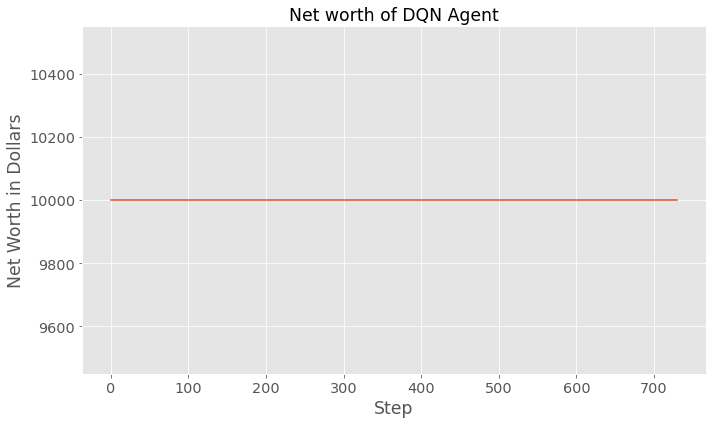

In [23]:
#Plot the networth
#dates = subset_data.index
plt.figure(figsize=(10, 6), tight_layout=True)
plt.plot(portfolio.performance.index, portfolio.performance['net_worth'], label="Net Worth")
plt.xlabel("Step")
plt.ylabel("Net Worth in Dollars")
plt.title("Net worth of DQN Agent")
plt.show()

In [24]:
p = portfolio.performance
p.loc[:, [("/USD" in name) for name in p.columns]]

,predictit:/USD-WARREN,predictit:/USD-CRUZ,predictit:/USD-MANCHIN,predictit:/USD-SANDERS,predictit:/USD-NELSON,predictit:/USD-DONNELLY,predictit:/USD-PELOSI,predictit:/USD-MANAFORT,predictit:/USD-BROWN,predictit:/USD-RYAN,predictit:/USD-STABENOW,predictit:/USD:/free,predictit:/USD:/locked,predictit:/USD:/total
step,,,,,,,,,,,,,,
0,0.80,0.81,0.69,0.85,0.71,0.28,0.87,0.15,0.68,0.79,0.80,10000,0,10000
1,0.79,0.78,0.69,0.85,0.71,0.28,0.87,0.15,0.68,0.79,0.80,10000,0,10000
2,0.78,0.81,0.69,0.85,0.71,0.28,0.87,0.15,0.68,0.79,0.80,10000,0,10000
3,0.79,0.81,0.54,0.86,0.71,0.28,0.87,0.15,0.68,0.79,0.80,10000,0,10000
4,0.80,0.81,0.54,0.81,0.71,0.28,0.87,0.15,0.68,0.79,0.80,10000,0,10000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,0.99,0.99,0.99,0.99,0.01,0.01,0.99,0.01,0.99,0.01,0.99,10000,0,10000
727,0.99,0.99,0.99,0.99,0.01,0.01,0.99,0.01,0.99,0.01,0.99,10000,0,10000
728,0.99,0.99,0.99,0.99,0.01,0.01,0.99,0.01,0.99,0.01,0.99,10000,0,10000


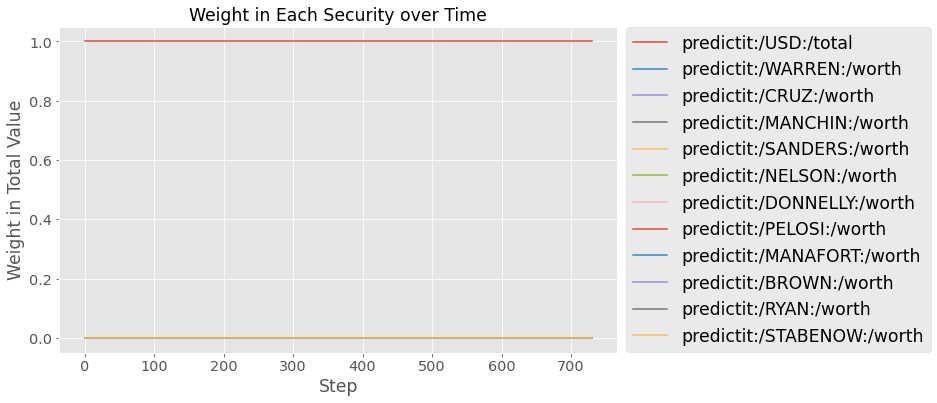

In [25]:
### Plot the total balance in each type of item
portfolio.weights.iloc[:,:].plot(figsize=(10, 6))
plt.xlabel("Step")
plt.ylabel("Weight in Total Value")
plt.title("Weight in Each Security over Time")
plt.legend(loc='center left', bbox_to_anchor=(1,.5))
plt.show()

## Extra Stuff

In [ ]:
apath = "/Users/jasonfiacco/Documents/Yale/Senior/thesis/jasonfiacco-selectedmarkets-mytickers.xlsx"
df = pd.read_excel(apath, skiprows=2)
jason_tickers = df.iloc[:, 5].tolist()
descriptions = df.iloc[:, 1].tolist()

for ticker, description in zip(jason_tickers, descriptions):
    l = "{} = Instrument(\'{}\', 2, \'{}\')".format(ticker, ticker, description)
    print(l)